In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from collections import Counter
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
import warnings
import warnings
def foo():
    warnings.warn("This is a warning message", UserWarning)
# Ignore all warnings
warnings.filterwarnings("ignore")
foo()

In [2]:
df=pd.read_csv("data/data.csv")


In [3]:
df.head()

Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor       4.6   
1           1  Volkswagen                       ID.3 Pure      10.0   
2           2    Polestar                               2       4.7   
3           3         BMW                            iX3        6.8   
4           4       Honda                              e        9.5   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

#### ` df.info() ` tell about dataset contain null value or not and also tell about data type of each cell

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


#### `df.isnull()`It is use for check total number of null value each columns

In [5]:
df.isnull().sum()

Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [6]:
df.head()

Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor       4.6   
1           1  Volkswagen                       ID.3 Pure      10.0   
2           2    Polestar                               2       4.7   
3           3         BMW                            iX3        6.8   
4           4       Honda                              e        9.5   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

## EDA(Exploratory Data Analysis)

### Description Statisticcs of the dataset

In [7]:
df.describe()

Unnamed: 0    AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
count  103.000000  103.000000    103.000000  103.000000       103.000000   
mean    51.000000    7.396117    179.194175  338.786408       189.165049   
std     29.877528    3.017430     43.573030  126.014444        29.566839   
min      0.000000    2.100000    123.000000   95.000000       104.000000   
25%     25.500000    5.100000    150.000000  250.000000       168.000000   
50%     51.000000    7.300000    160.000000  340.000000       180.000000   
75%     76.500000    9.000000    200.000000  400.000000       203.000000   
max    102.000000   22.400000    410.000000  970.000000       273.000000   

       FastCharge_KmH       Seats      PriceEuro  
count      103.000000  103.000000     103.000000  
mean       444.271845    4.883495   55811.563107  
std        203.949253    0.795834   34134.665280  
min        170.000000    2.000000   20129.000000  
25%        260.000000    5.000000   34429.500000  
50%        440.000000    5.000000   45000.000000  
75%        555.000000    5.000000   65000.000000  
max        940.000000    7.000000  215000.000000

### Read the data
and also change Euro Price in India price

In [8]:

df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()
     

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161             940            1        AWD   
1       270              167             250            0        RWD   
2       400              181             620            1        AWD   
3       360              206             560            1        RWD   
4       170              168             190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  4615.9360  
1  Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2  Type 2 CCS   Liftback       D      5      56440  4695.8080  
3  Type 2 CCS        SUV       D      5      68040  5660.9280  
4  Type 2 CCS  Hatchback       B      4      32997  2745.3504

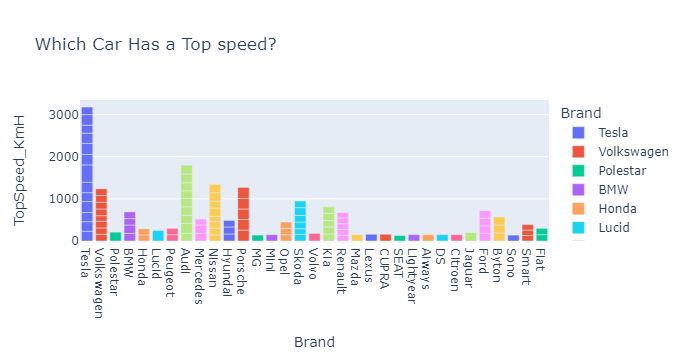

In [9]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)
     

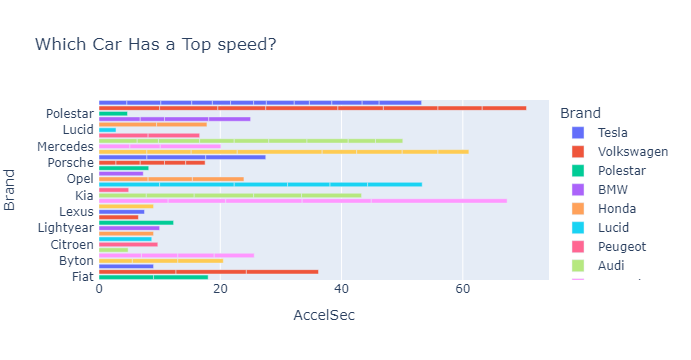

In [10]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Accelsec'})
pio.show(fig)

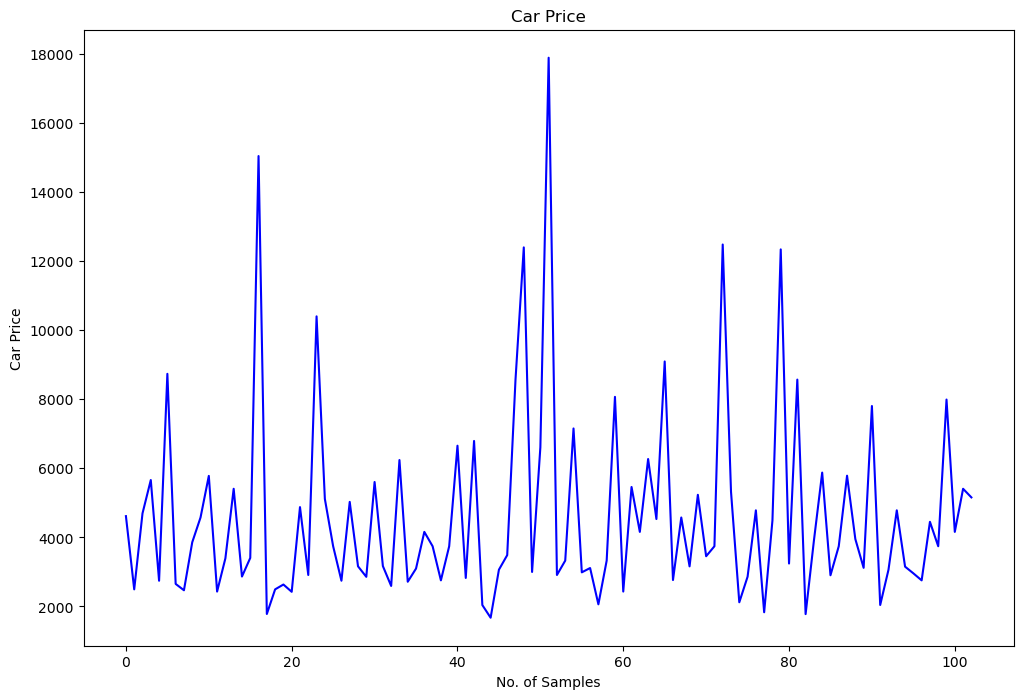

In [11]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'Blue');

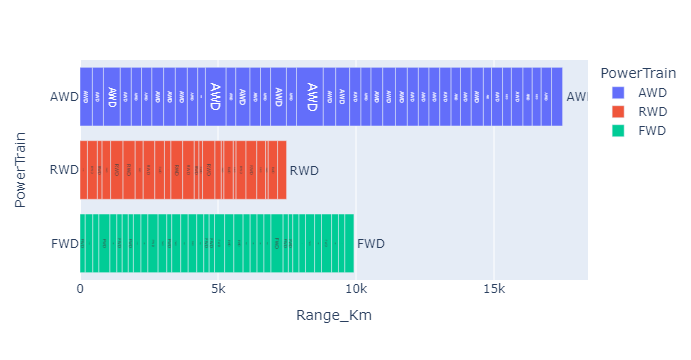

In [12]:

fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

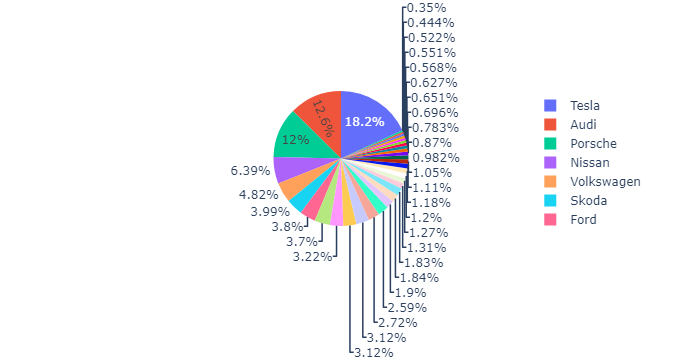

In [13]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

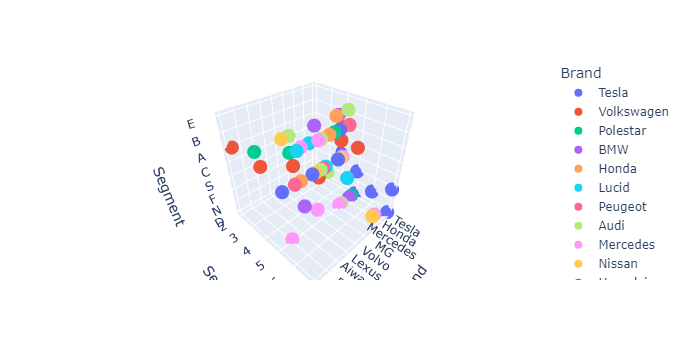

In [14]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
pio.show(fig)

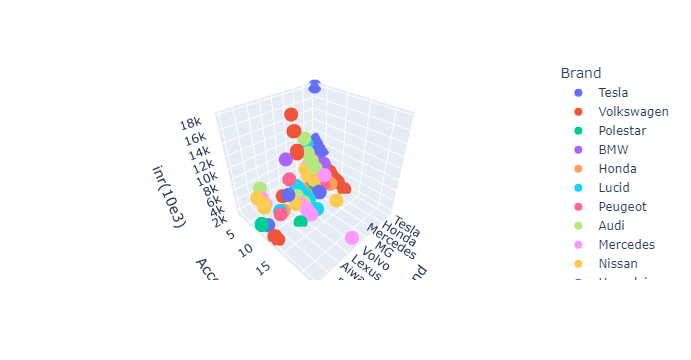

In [15]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
pio.show(fig)

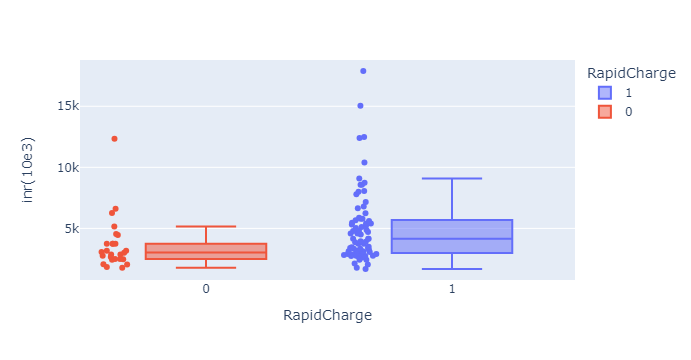

In [16]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)     

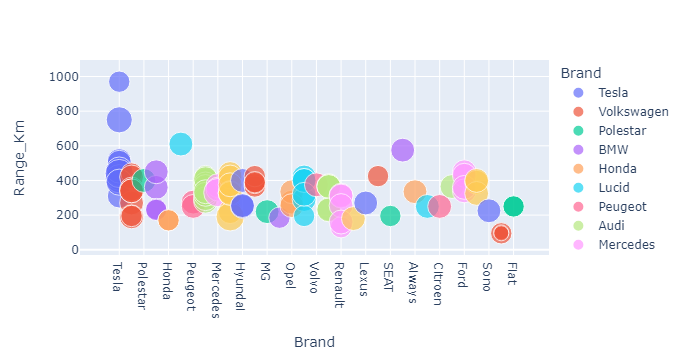

In [17]:

fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

### Pairplot of all the columns based on Rapid Charger presence


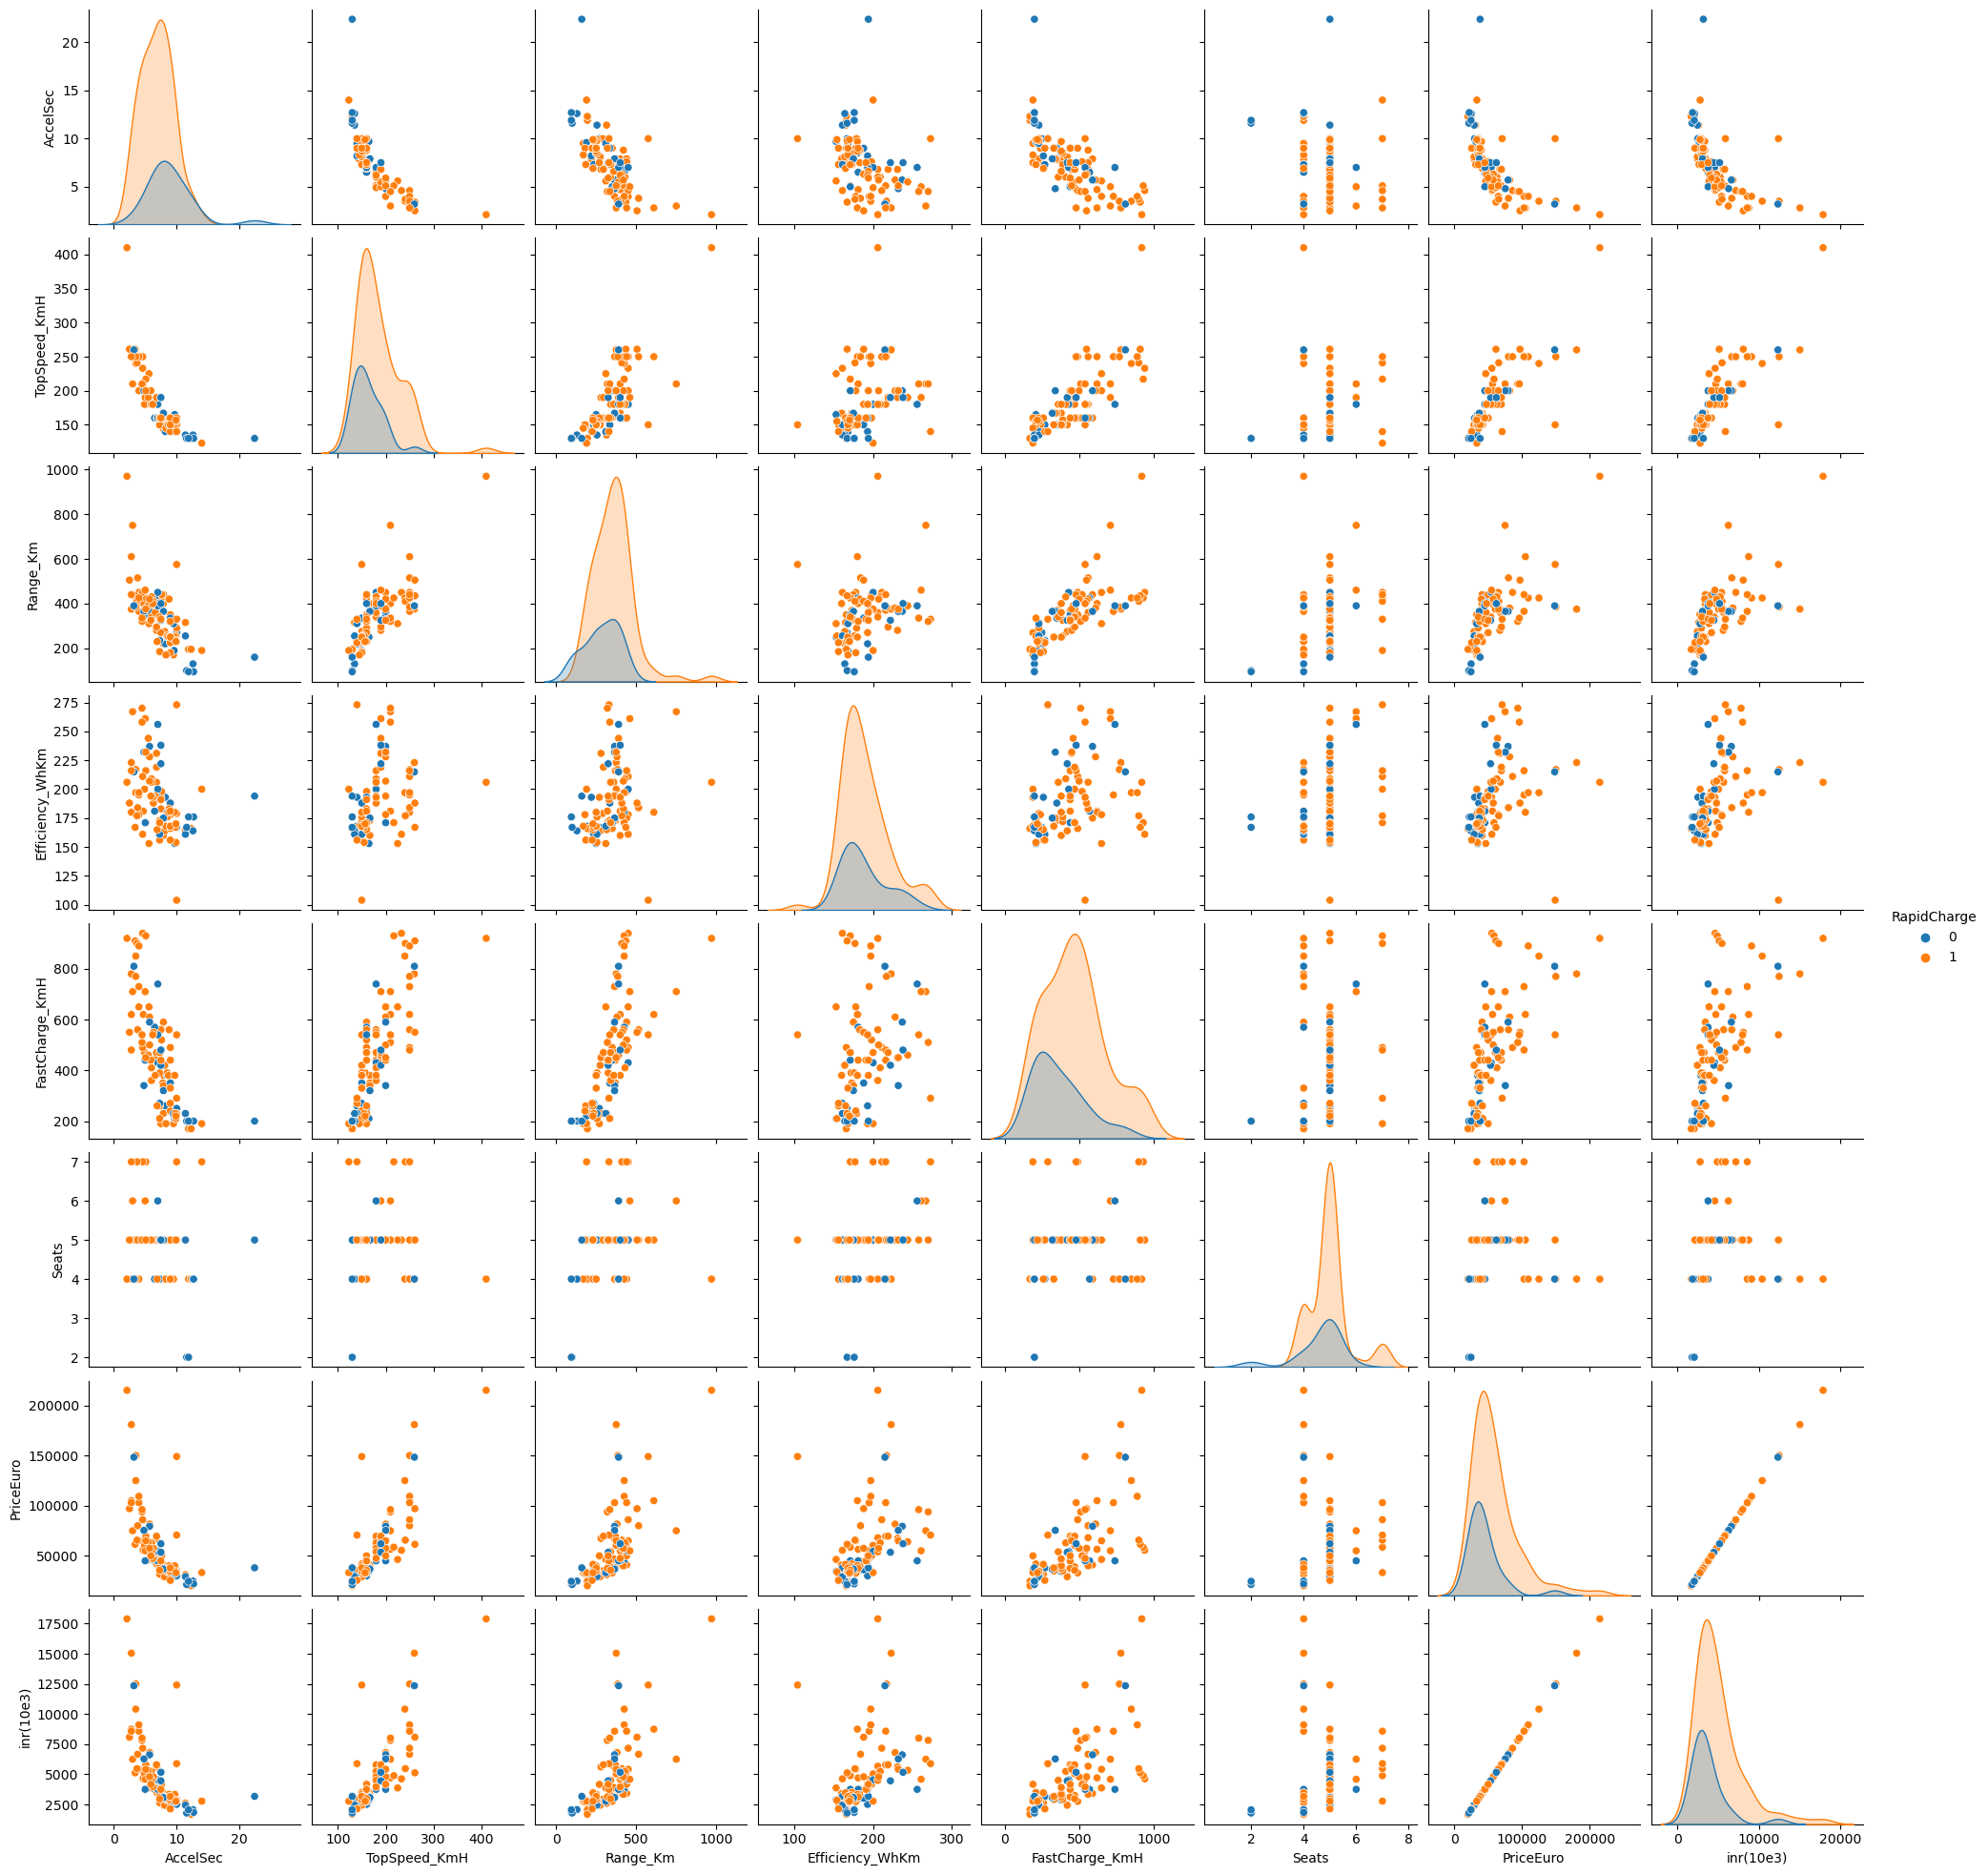

In [18]:
fig=sns.pairplot(df,hue='RapidCharge');
fig.savefig("output.png")


### Heatmap to show the correlation of the data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [20]:
df.corr(numeric_only=True)

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
AccelSec         1.000000     -0.786195 -0.677062        -0.382904   
TopSpeed_KmH    -0.786195      1.000000  0.746662         0.355675   
Range_Km        -0.677062      0.746662  1.000000         0.313077   
Efficiency_WhKm -0.382904      0.355675  0.313077         1.000000   
FastCharge_KmH  -0.733559      0.785218  0.723714         0.321925   
RapidCharge     -0.292518      0.220113  0.251910         0.013894   
Seats           -0.175335      0.126470  0.300163         0.301230   
PriceEuro       -0.627174      0.829057  0.674844         0.396705   
inr(10e3)       -0.627174      0.829057  0.674844         0.396705   

                 FastCharge_KmH  RapidCharge     Seats  PriceEuro  inr(10e3)  
AccelSec              -0.733559    -0.292518 -0.175335  -0.627174  -0.627174  
TopSpeed_KmH           0.785218     0.220113  0.126470   0.829057   0.829057  
Range_Km               0.723714     0.251910  0.300163   0.674844   0.674844  
Efficiency_WhKm        0.321925     0.013894  0.301230   0.396705   0.396705  
FastCharge_KmH         1.000000     0.225863  0.193364   0.667873   0.667873  
RapidCharge            0.225863     1.000000  0.196721   0.199737   0.199737  
Seats                  0.193364     0.196721  1.000000   0.020920   0.020920  
PriceEuro              0.667873     0.199737  0.020920   1.000000   1.000000  
inr(10e3)              0.667873     0.199737  0.020920   1.000000   1.000000

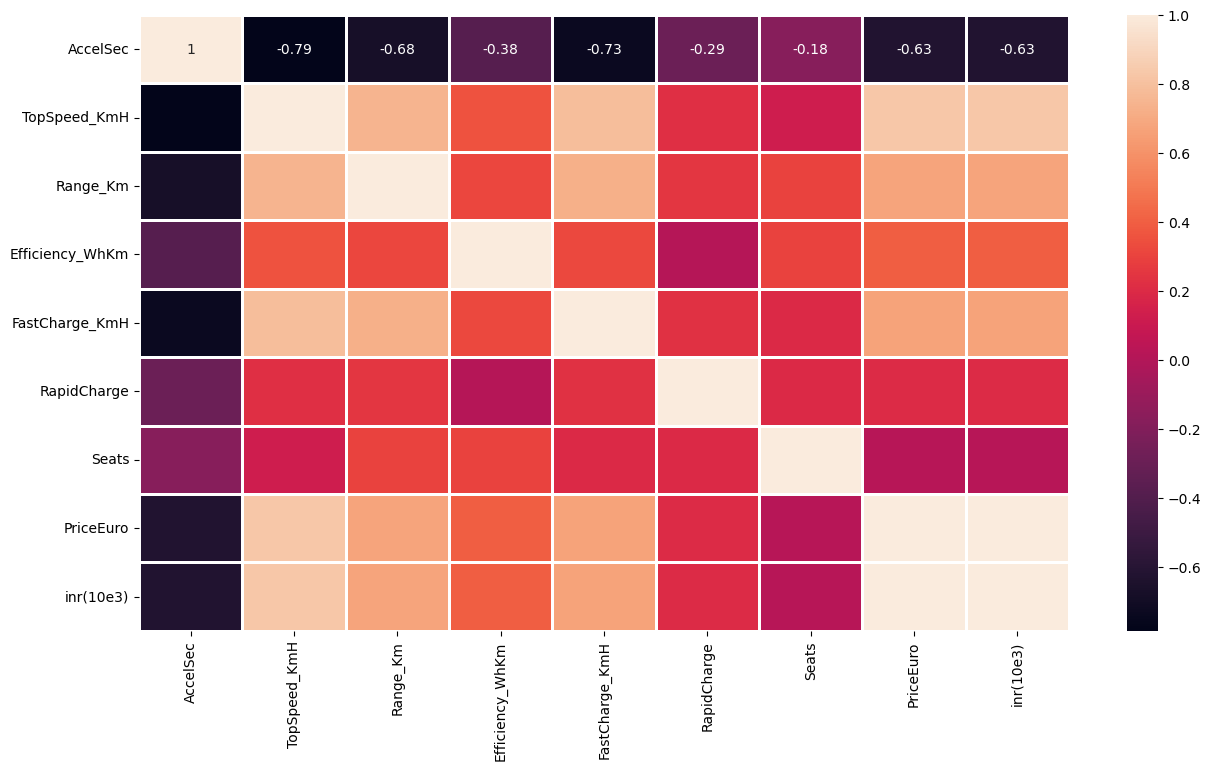

In [28]:

ax= plt.figure(figsize=(15,8))
fig=sns.heatmap(df.corr(numeric_only=True),linewidths=1,linecolor='white',annot=True)
fig.get_figure().savefig("heatmap.png")

## Making Some Comparisons for our dataset
### Frequency of the Brands in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

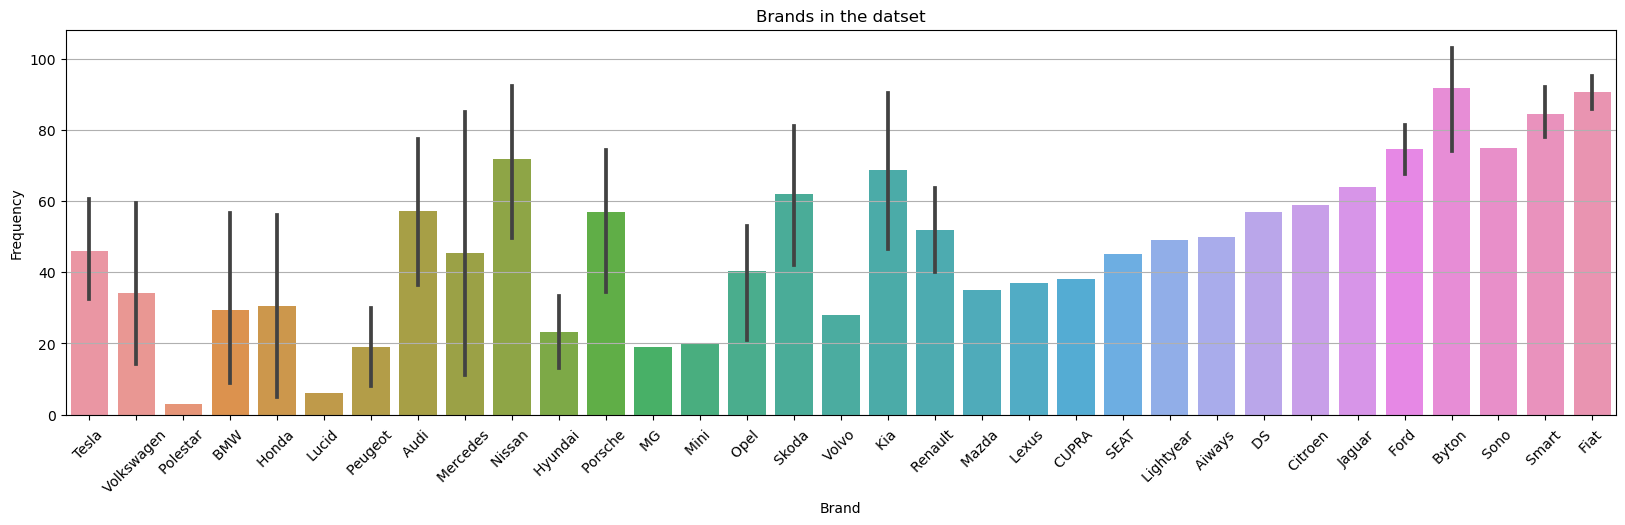

In [31]:
a=np.arange(1,104)
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

### Top speeds achieved by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

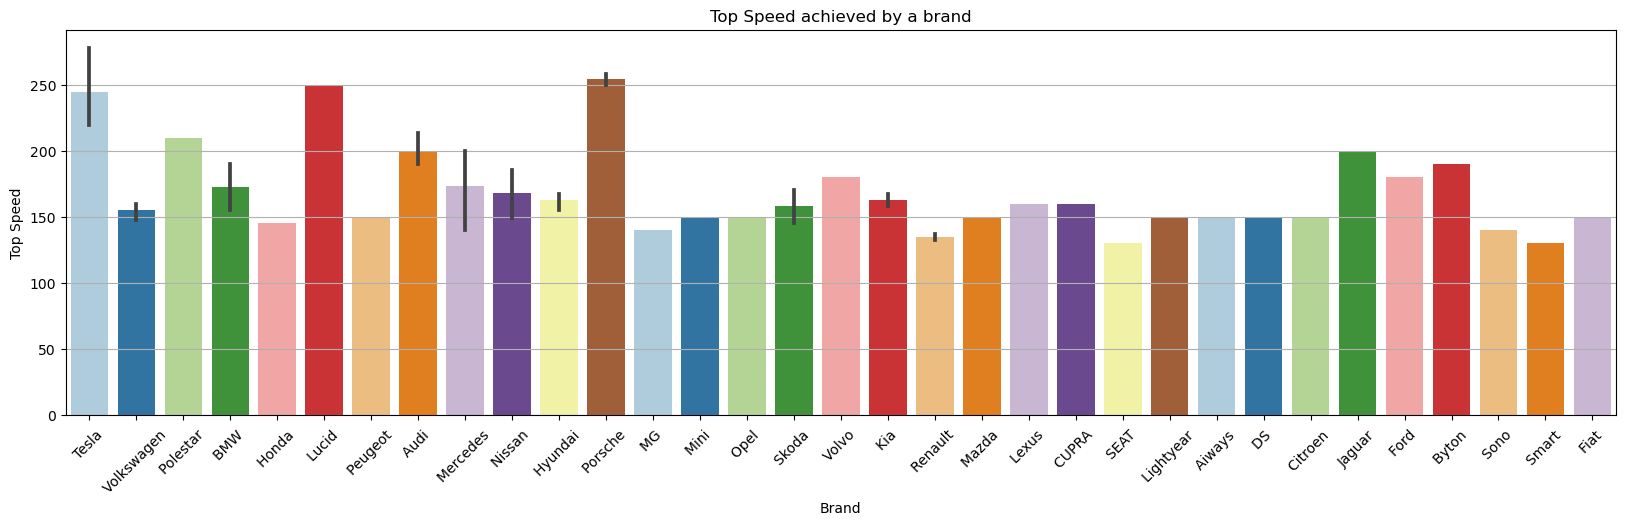

In [33]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
     

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

### Range a car can achieve

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

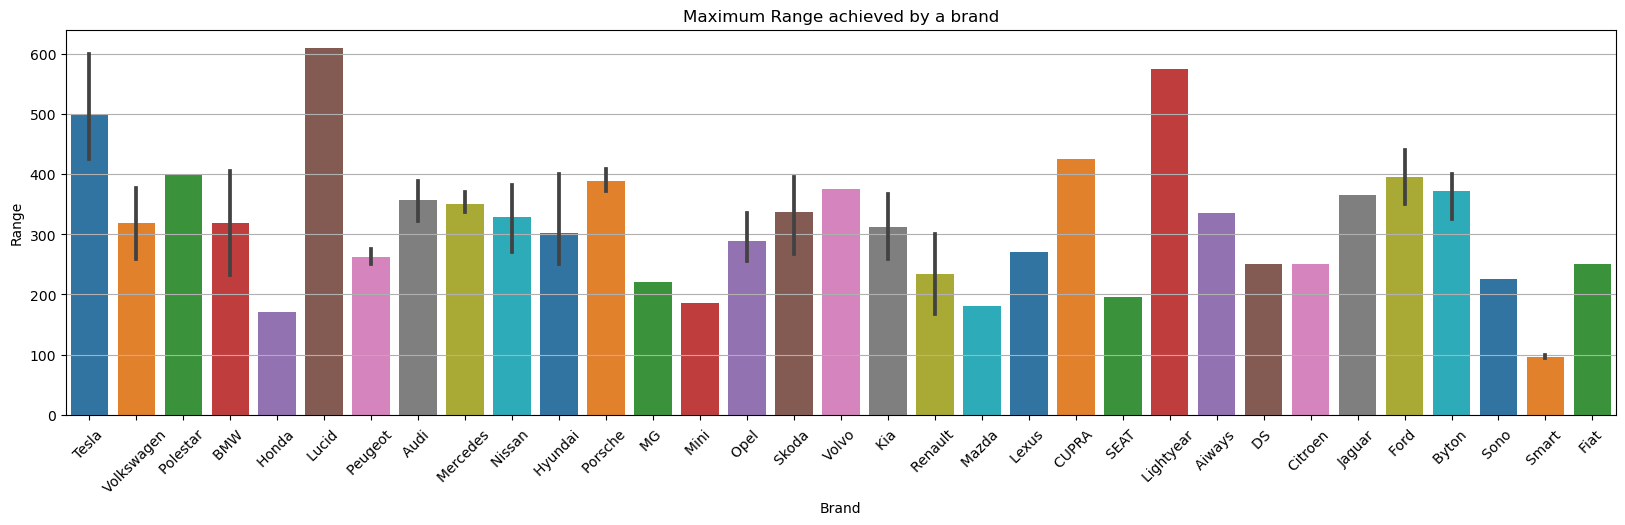

In [36]:

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

### Car efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

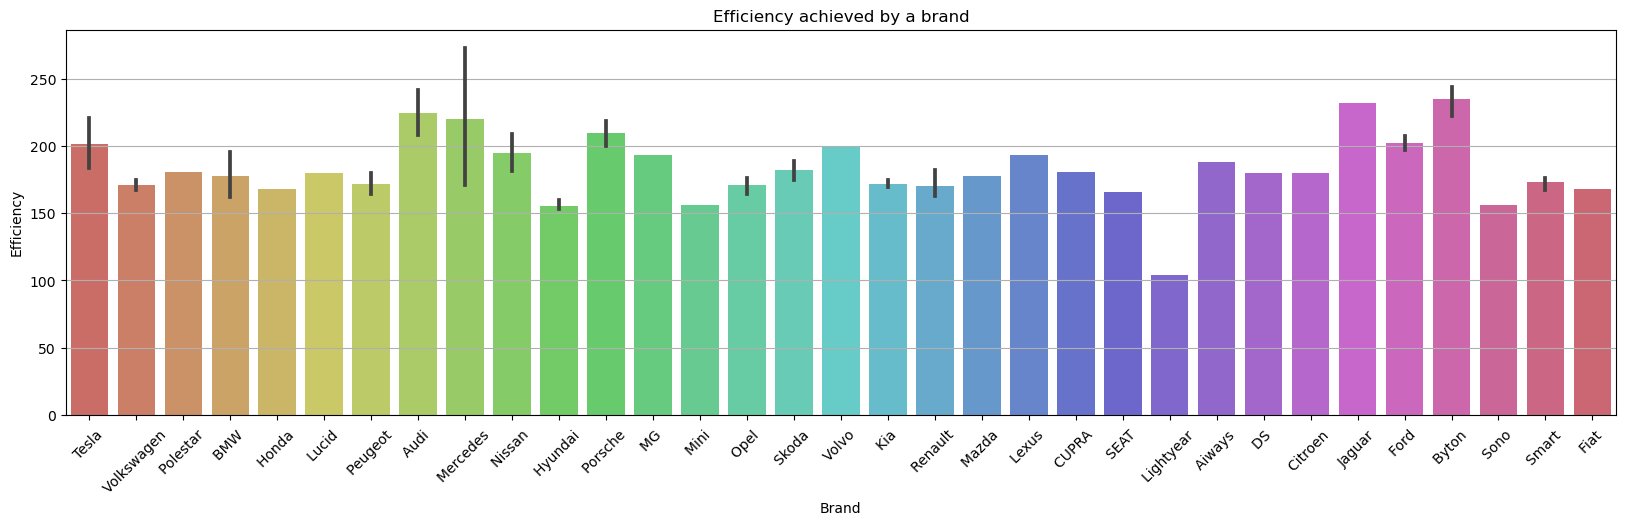

In [37]:

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton , Jaguar and Audi are the most efficient and Lightyear the least

## Number of seats in each car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

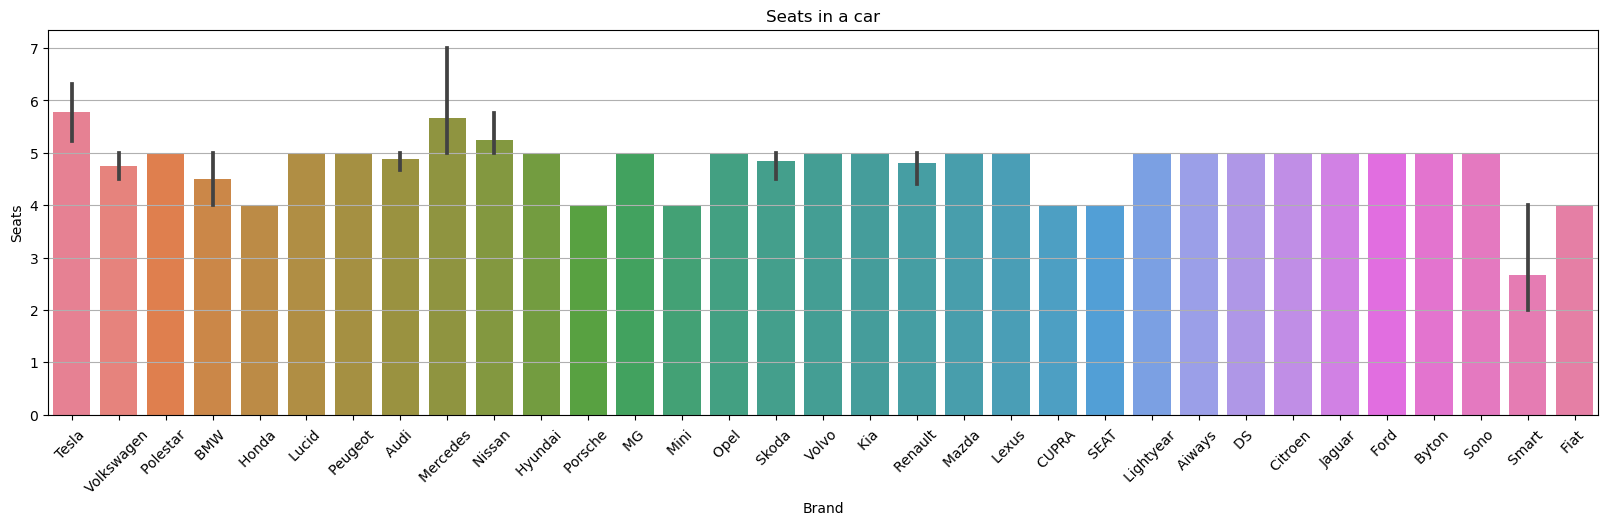

In [39]:

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

## Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

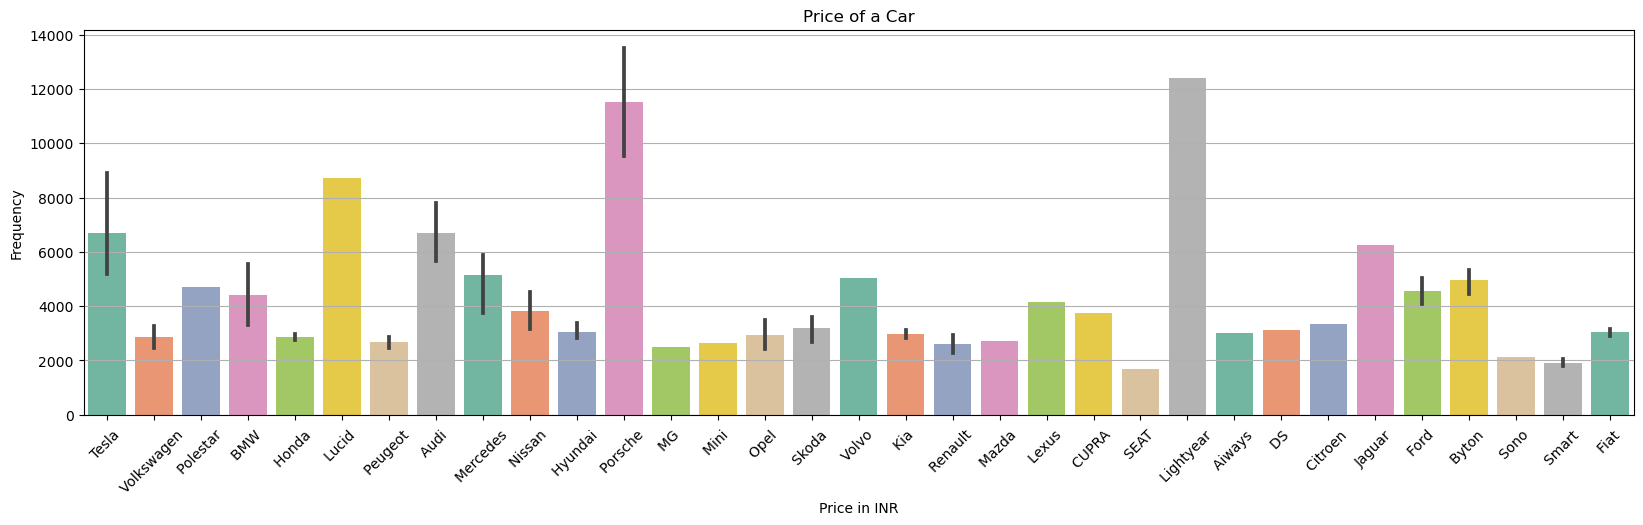

In [41]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

### Type of Plug used for charging

Text(0.5, 1.0, 'Plug Type')

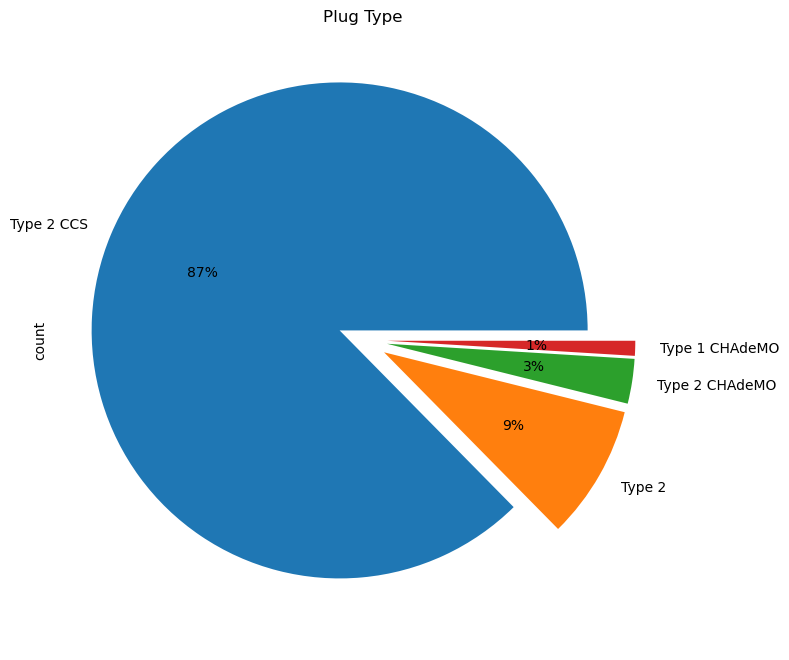

In [42]:

df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

## Cars and their body style

Text(0.5, 1.0, 'Body Style')

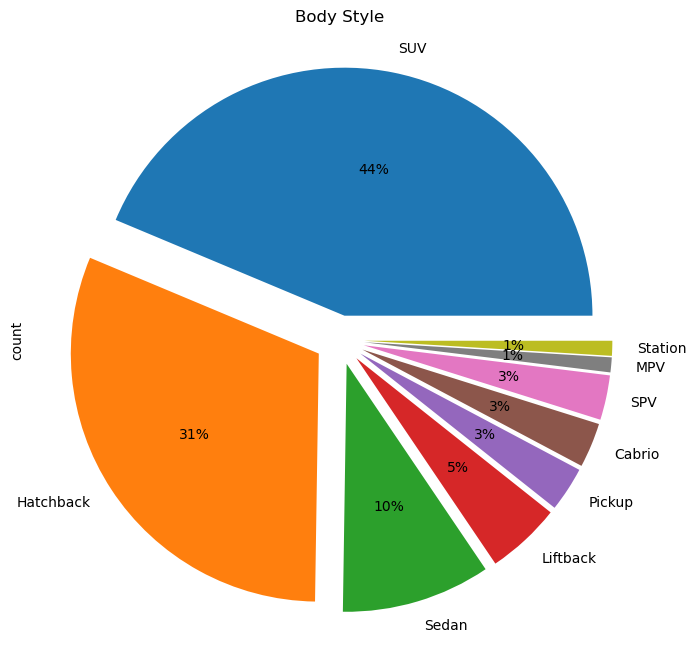

In [43]:

df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')


Most cars are eiher SUV or Hatchback

## Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

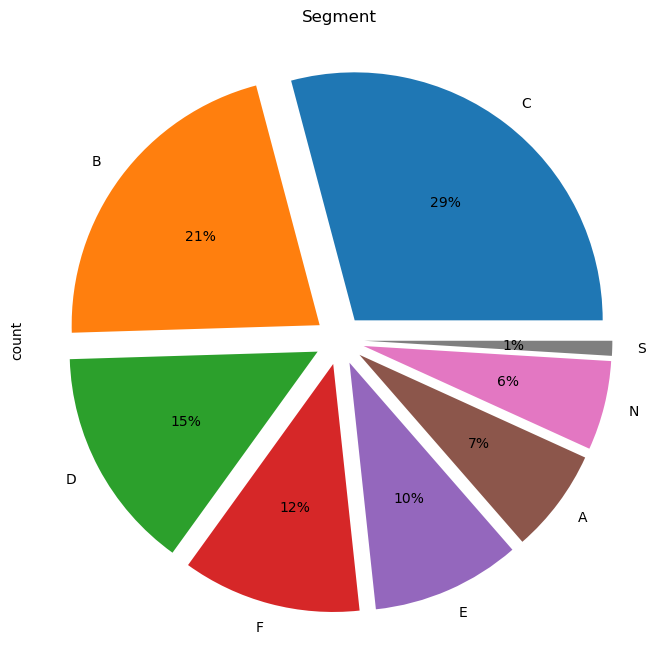

In [44]:

df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

## Number of Seats

Text(0.5, 1.0, 'Seats')

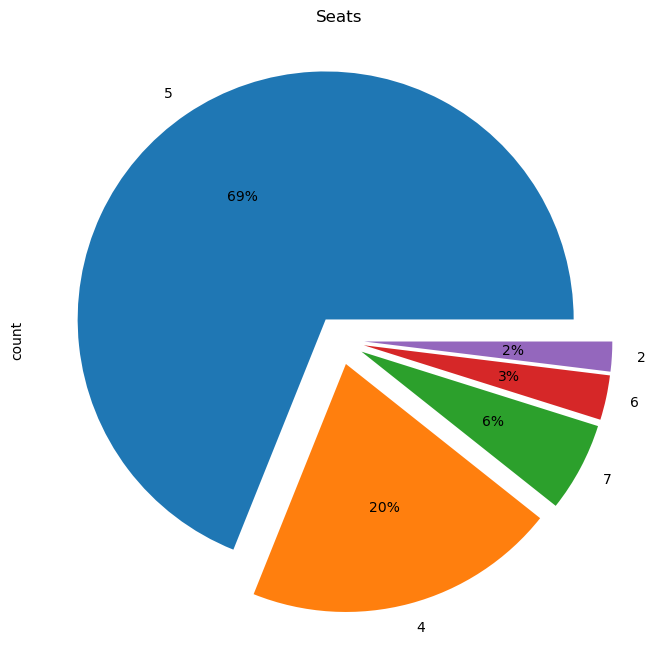

In [46]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [47]:

df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

In [48]:

df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)
     

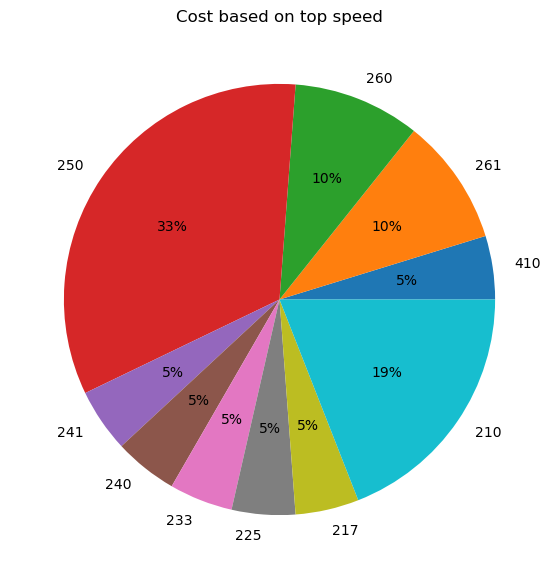

In [49]:

plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

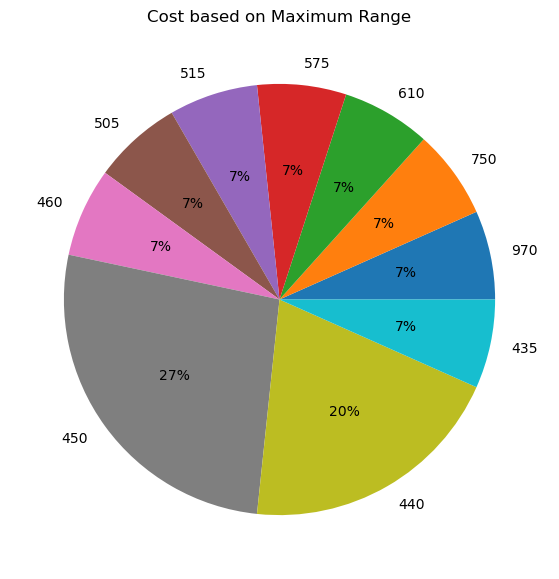

In [50]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()
     

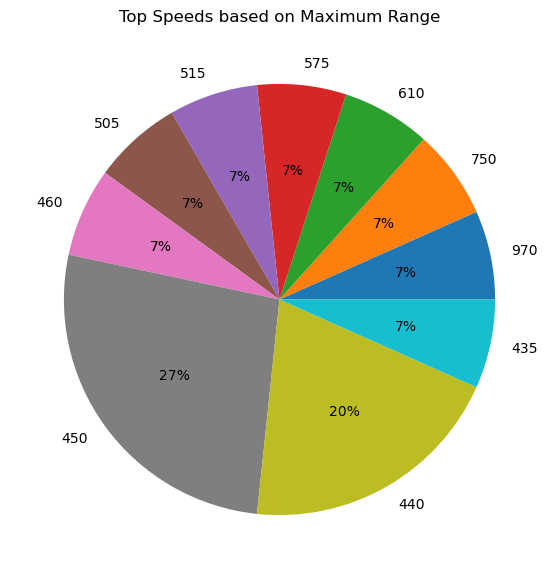

In [51]:

plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

### Regression

### Putting independent variables as x and dependent variable as y

In [52]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']
     

### Finding out the linear regression using OLS method

In [55]:

x= sm.add_constant(x)
results = sm.OLS(y,x)

## Fitting the model and summarizing

In [56]:

model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.57e-24
Time:                        21:09:47   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

Standard Errors assume that the covariance matrix of the errors is correctly specified.
The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

Only Top Speed and Efficieny are the two variables related to price

In [58]:
from  sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [115]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

## Finding out the R-squared value

In [64]:
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232659


##### Around 78% of the dependant variable has been explained by the independant variables

In [65]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [66]:

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)
     

In [68]:

log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# Confusion Matrix of the regression

In [71]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]], dtype=int64)

### Clustering

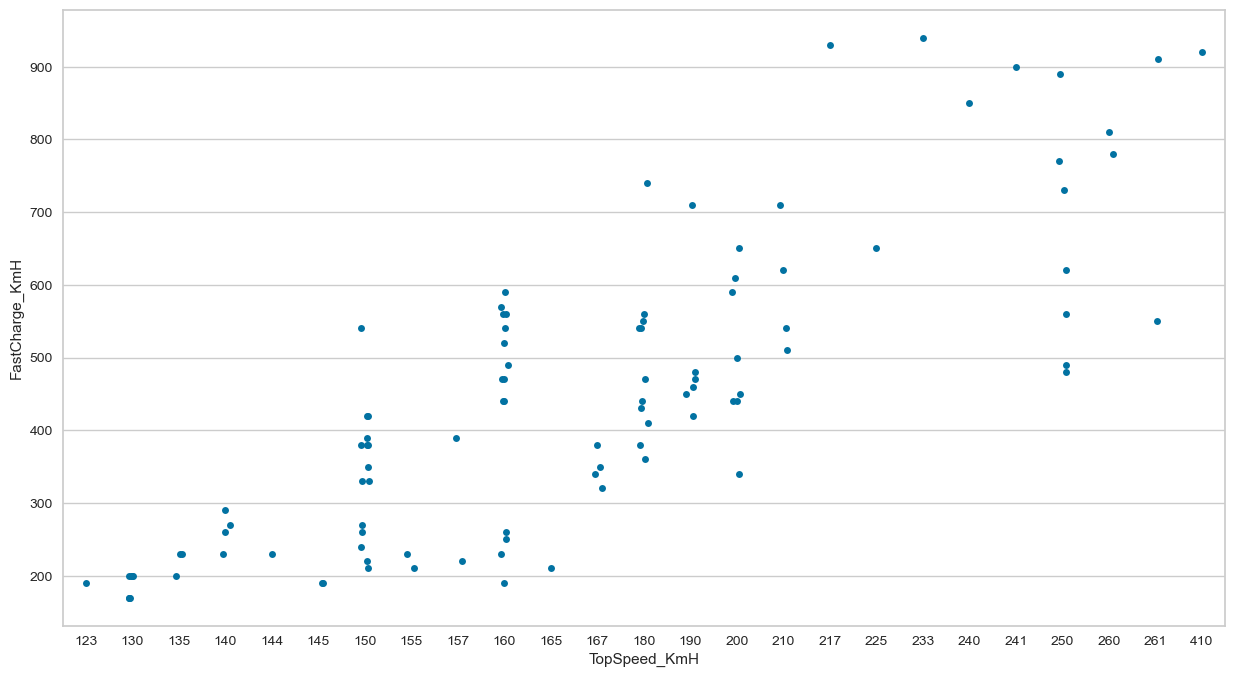

In [74]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True);

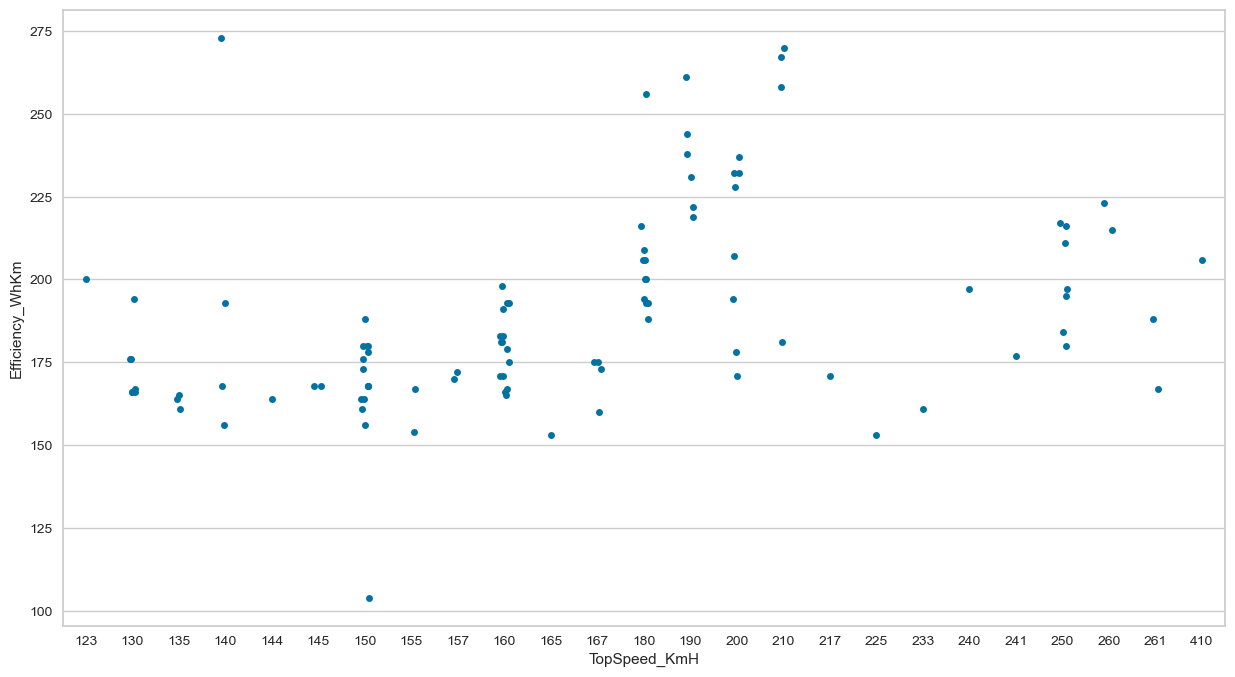

In [77]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True);

In [80]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [83]:

pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2
     

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0    2.429225 -0.554599 -1.147772 -0.882791  0.839988 -0.959297  0.998880   
1   -2.322483 -0.345449  0.896473 -1.305529  0.079598  0.235116 -0.213678   
2    1.587851  0.008899 -0.650523  0.041024  0.593537 -0.698248  0.058718   
3    0.291018 -0.000150 -0.307702 -0.514196 -1.608861  0.291624  0.364999   
4   -2.602679 -0.626489 -0.888088  0.585294 -0.802108  0.027387 -0.084955   
..        ...       ...       ...       ...       ...       ...       ...   
98  -0.297170  0.446713 -0.463601  0.102542 -0.346005 -0.100457  0.031080   
99   2.335018  0.630747  0.985883  1.560112 -0.817327 -0.121906  0.164115   
100  0.780642  0.426821 -0.298636  0.708598  0.481728 -0.540071 -0.139753   
101  1.540920  0.698754  0.422384  1.094921 -0.298113 -0.307992 -0.363230   
102  0.915051  0.261495  2.410642  0.188002  0.340820  0.015609 -0.171875   

          PC8       PC9  
0    0.711148 -0.396662  
1   -0.544135 -0.181867  
2    0.248837 -0.202775  
3   -0.235543  0.261663  
4   -0.507790 -0.049904  
..        ...       ...  
98   0.202253  0.145390  
99  -0.255651  0.141023  
100 -0.048733 -0.367509  
101  0.127251 -0.190397  
102  0.567633 -0.200822  

[103 rows x 9 columns]

In [84]:
df_9=data2.iloc[:,:9]
df_9.head(3)

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0  2.429225 -0.554599 -1.147772 -0.882791  0.839988 -0.959297  0.998880   
1 -2.322483 -0.345449  0.896473 -1.305529  0.079598  0.235116 -0.213678   
2  1.587851  0.008899 -0.650523  0.041024  0.593537 -0.698248  0.058718   

        PC8       PC9  
0  0.711148 -0.396662  
1 -0.544135 -0.181867  
2  0.248837 -0.202775

In [85]:

# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
     

PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
PC1      -0.396410  0.086150  0.064757  0.058253  0.144548  0.676910   
PC2       0.421973 -0.216762  0.002272 -0.068523  0.038208  0.045212   
PC3       0.238316  0.330919  0.571780  0.380475 -0.575143  0.024863   
PC4       0.394519 -0.138428 -0.047650 -0.296483 -0.092366 -0.237914   
Pc5       0.157195  0.269920 -0.803300  0.395300 -0.292581  0.086978   
PC6       0.389544 -0.024746 -0.076295 -0.387135 -0.032841  0.364461   
PC7       0.140425  0.801307  0.019535 -0.428983  0.165256  0.086668   
PC8       0.389779 -0.262265  0.073787  0.179862  0.043293  0.558706   
PC9       0.322888  0.180494  0.098293  0.486554  0.722814 -0.149888   

               PC7       PC8       PC9  
variable                                
PC1       0.412498  0.270655 -0.324562  
PC2       0.037576 -0.413810 -0.770777  
PC3       0.004703  0.144167 -0.098954  
PC4       0.728208  0.358365  0.105702  
Pc5       0.053875  0.040830 -0.056056  
PC6      -0.520811  0.534180 -0.038015  
PC7       0.098379 -0.320750  0.079999  
PC8       0.118043 -0.382139  0.517207  
PC9      -0.019098  0.265275 -0.033267

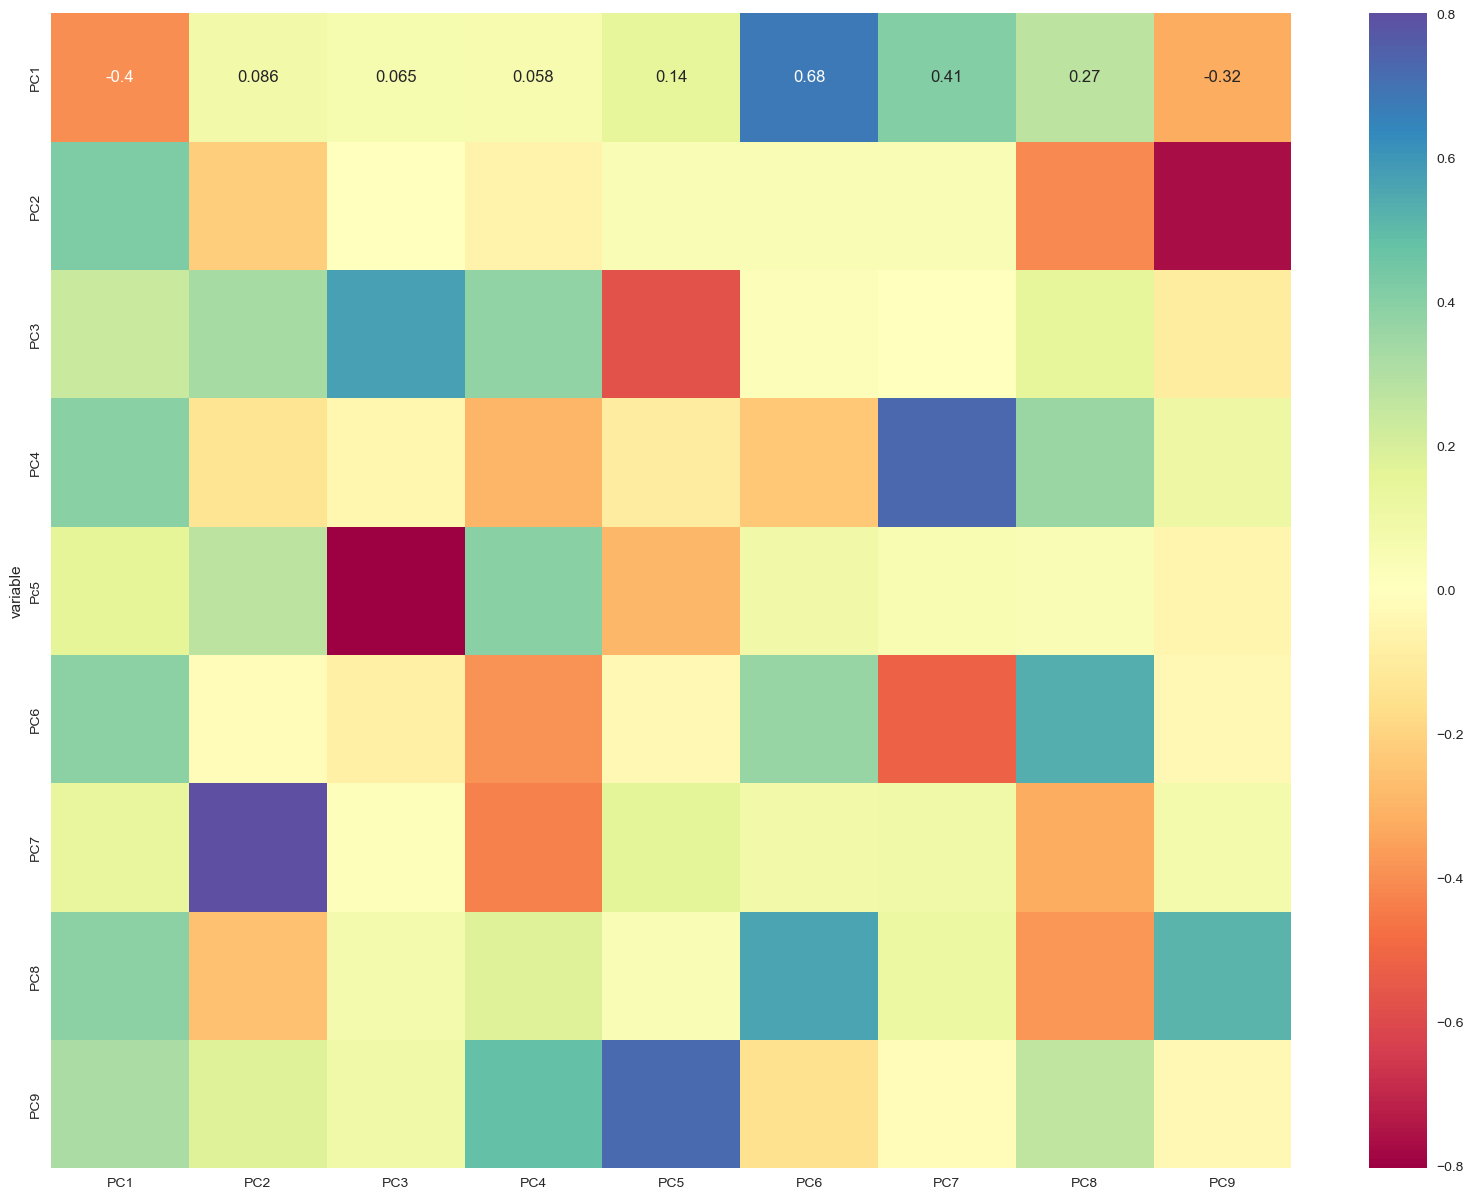

In [87]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

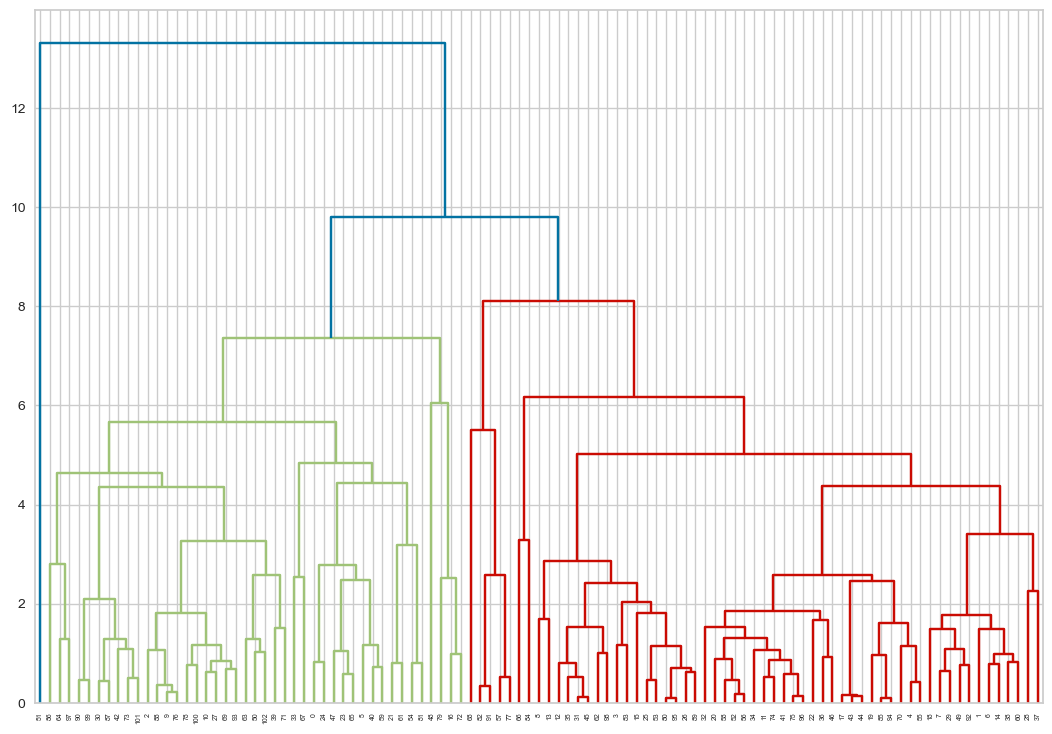

In [90]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

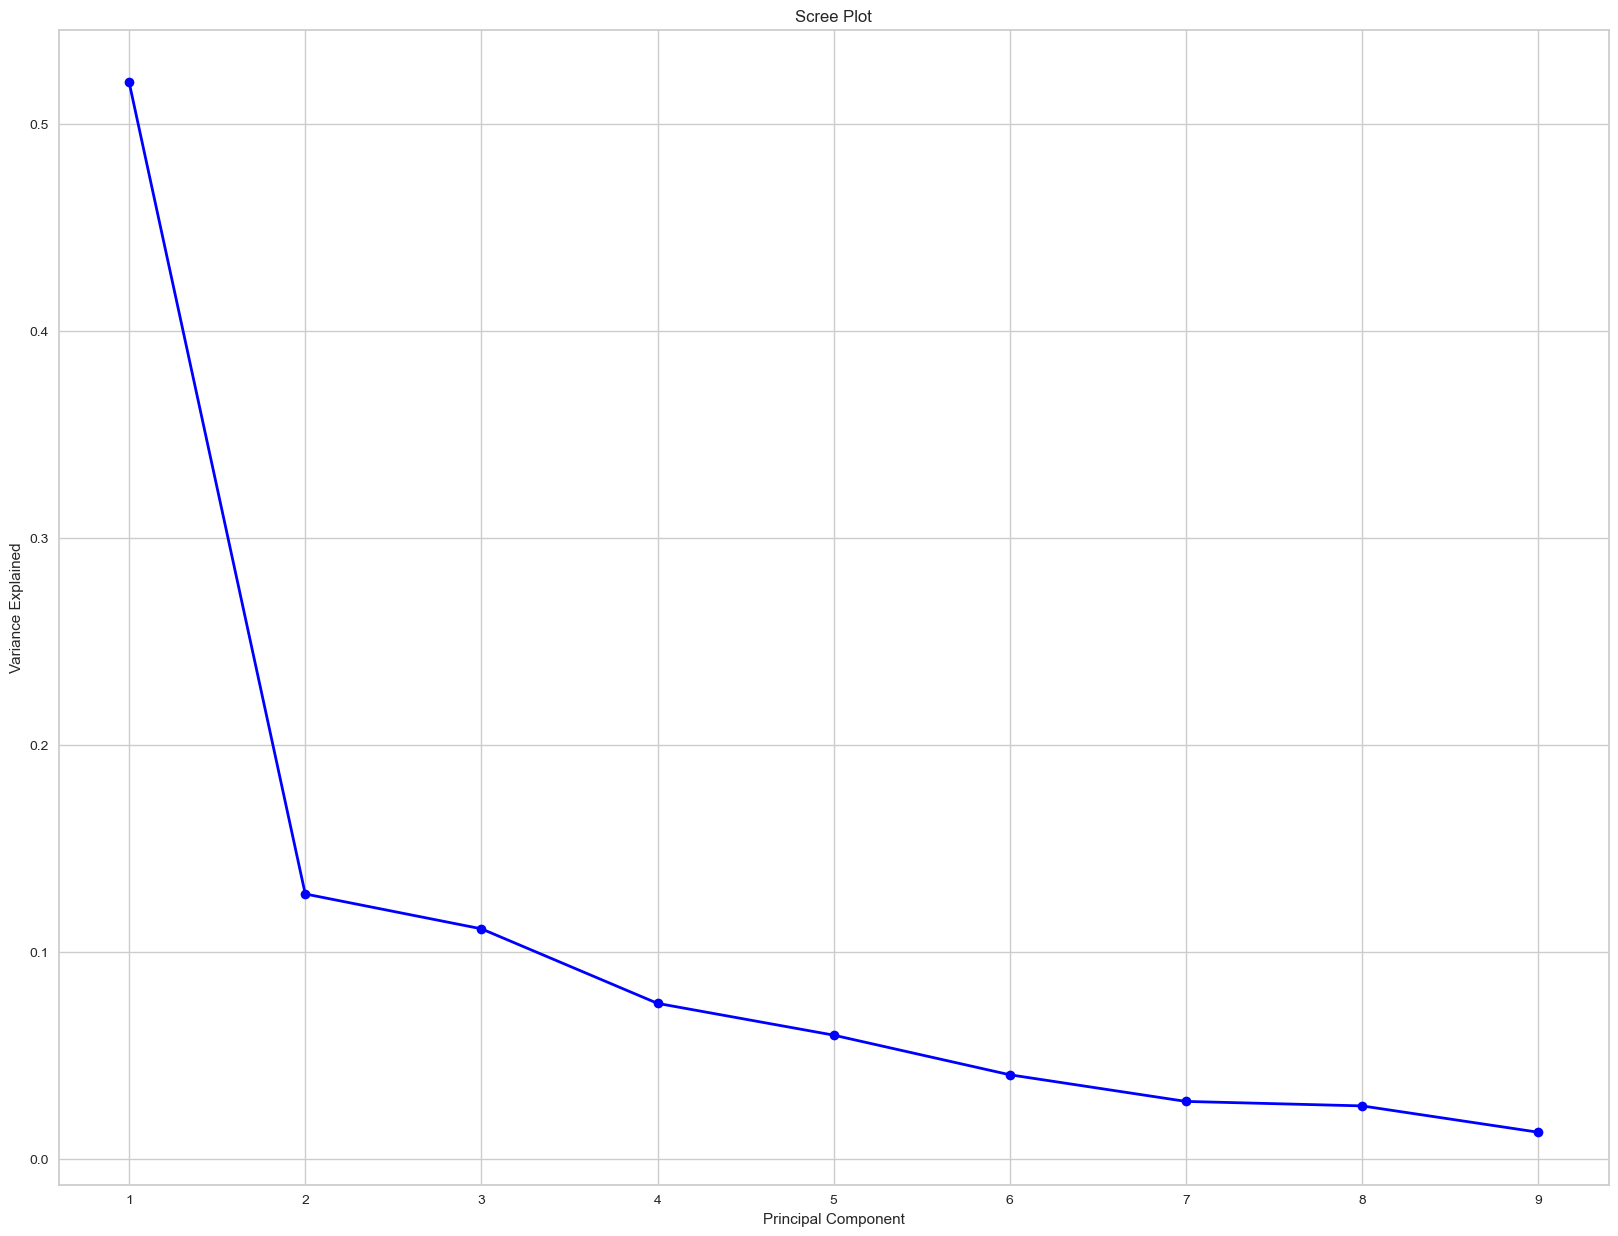

In [91]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

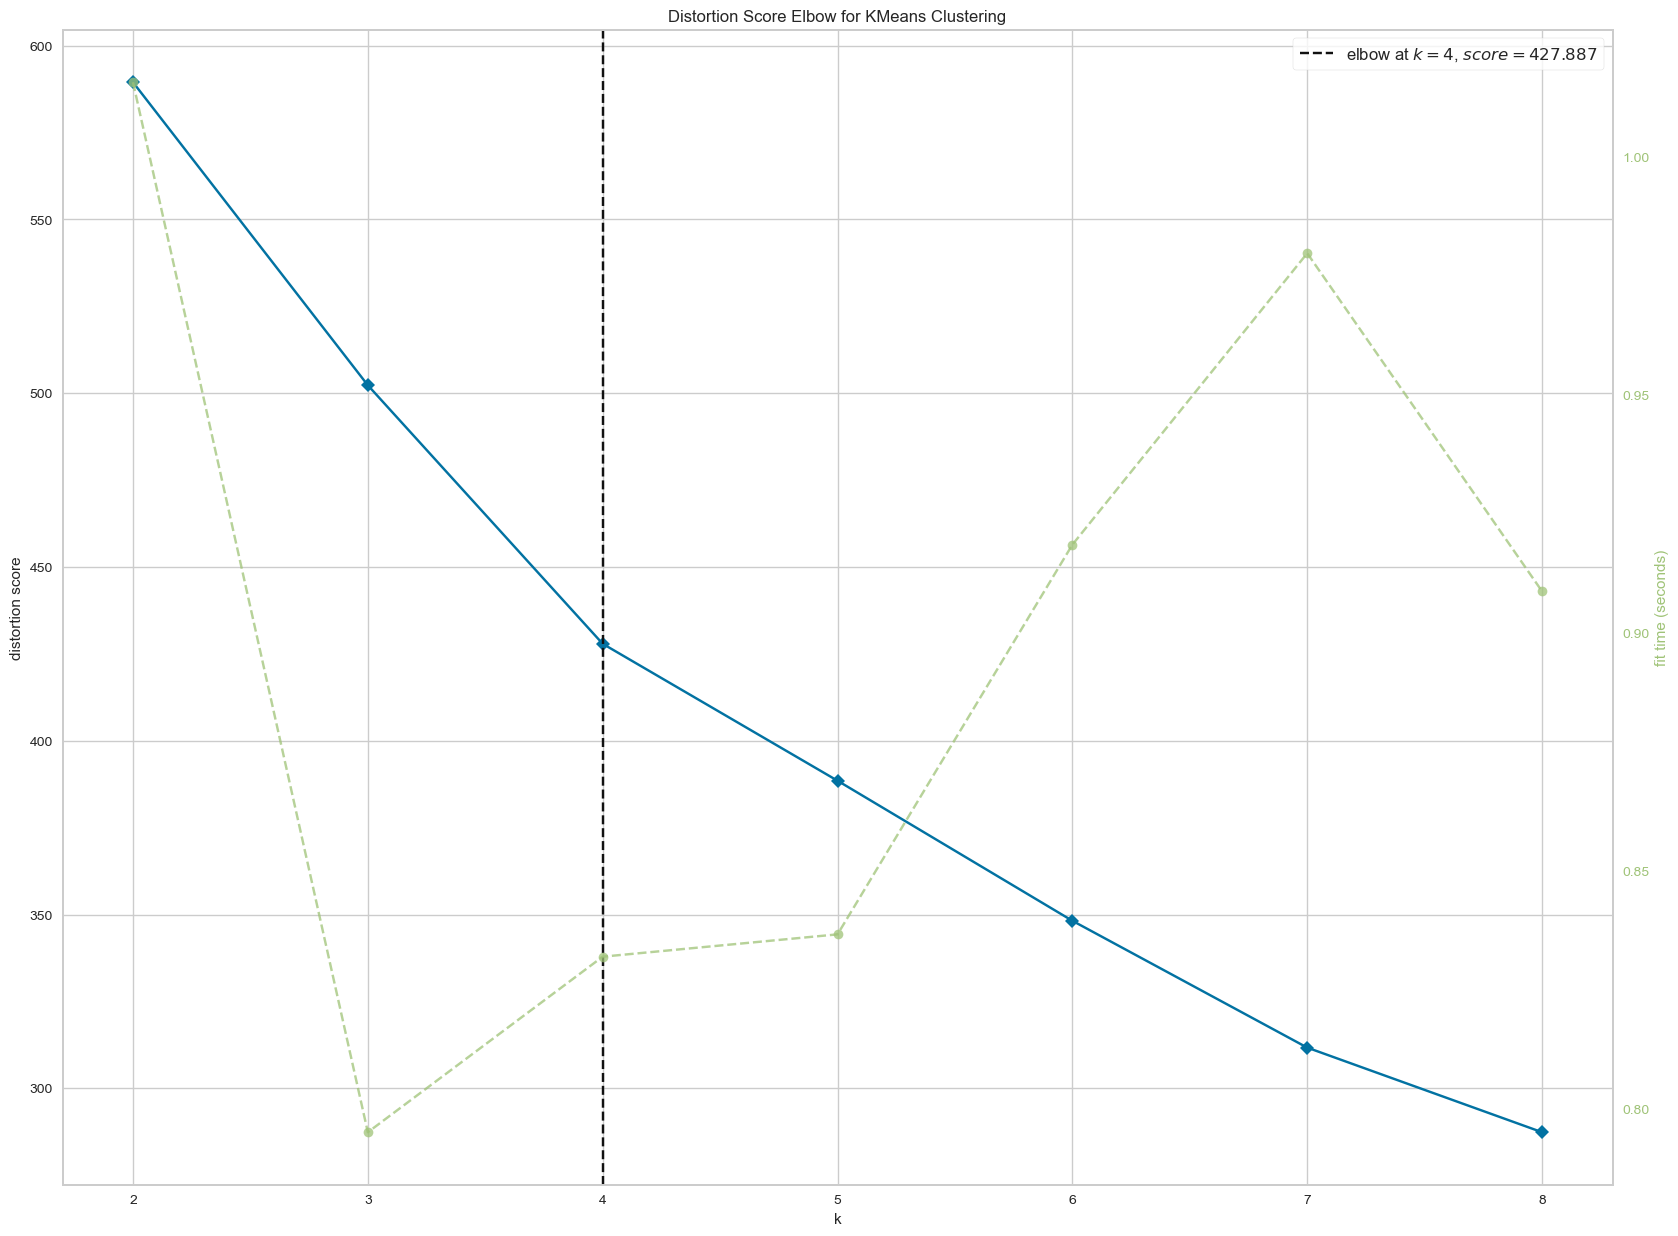

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:

model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

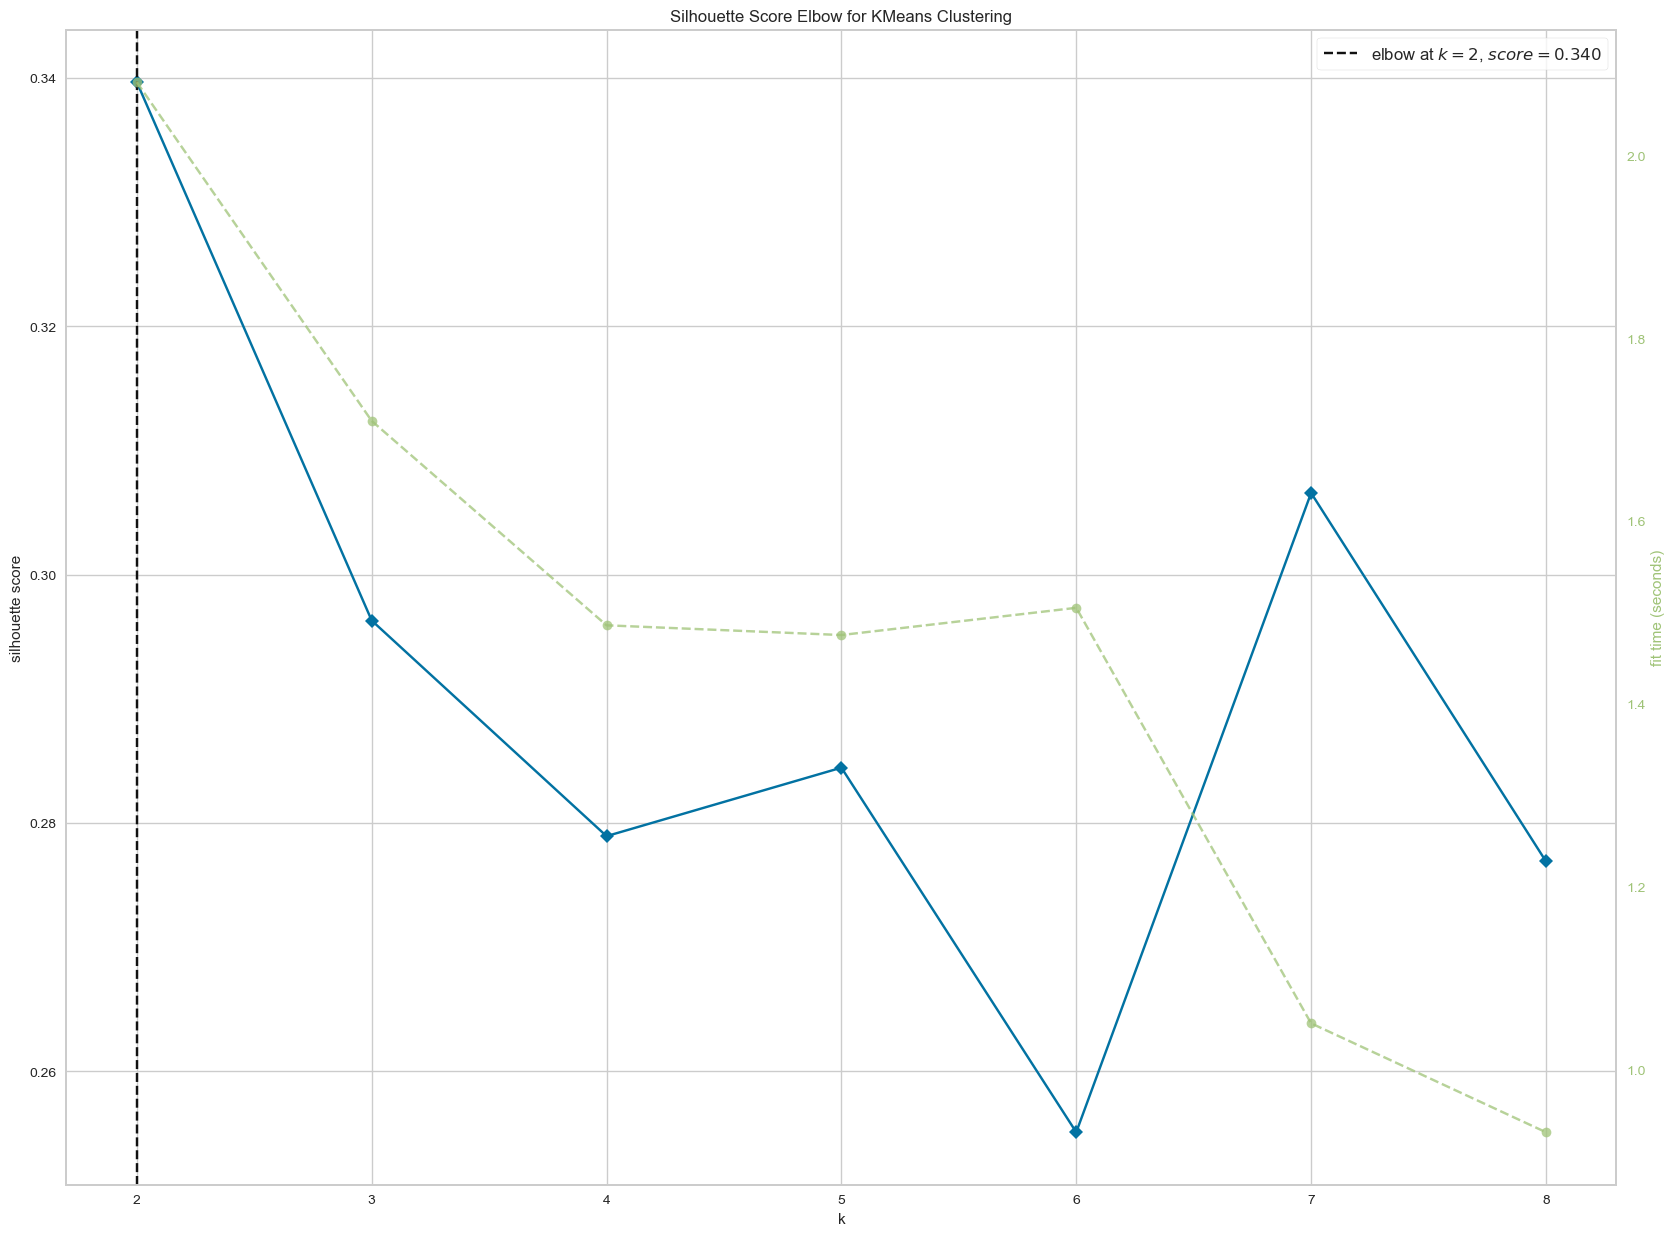

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [95]:

model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

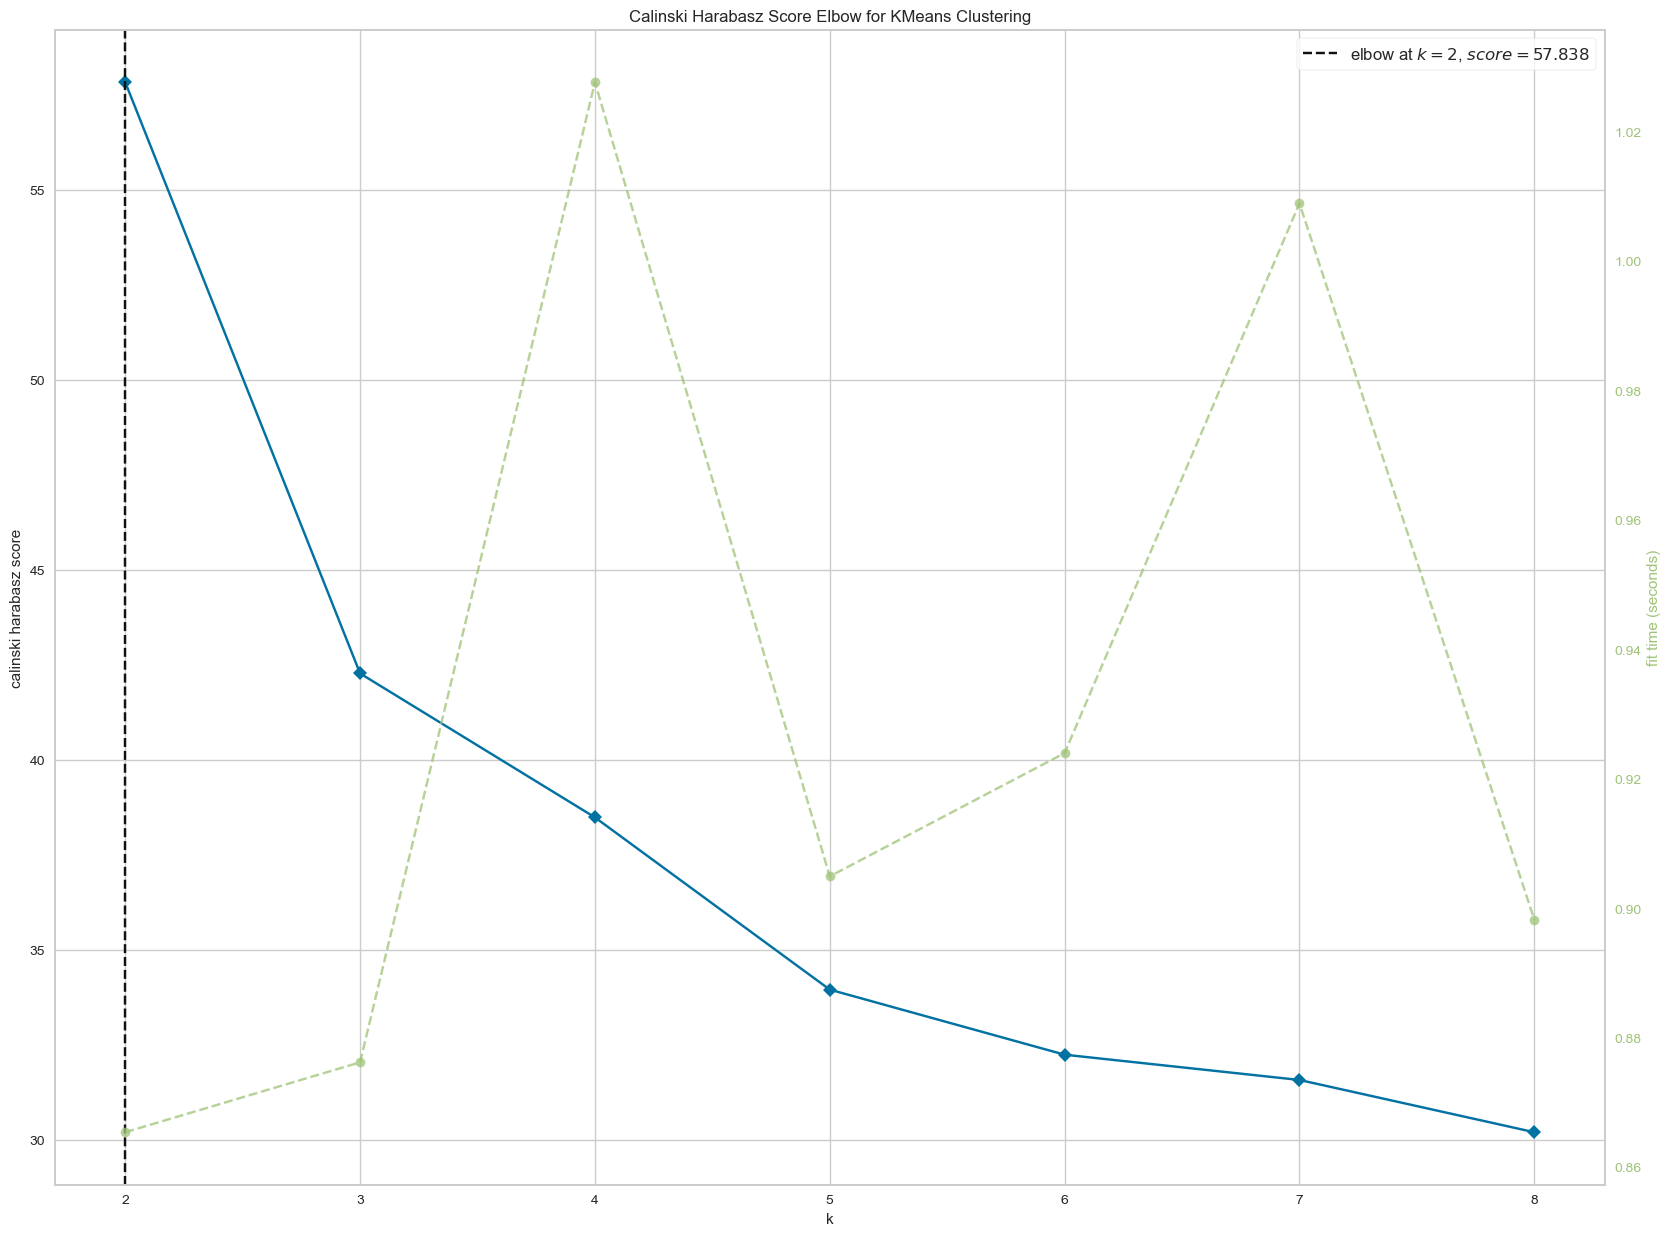

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [96]:

model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [97]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 3 1 0 0 2 3 3 0 1 1 0 0 0 3 0 2 0 3 0 0 2 0 2 2 0 0 1 3 3 1 0 0 1 0 0 0
 3 3 1 2 0 1 0 0 0 0 2 2 3 1 2 0 0 1 0 0 3 0 2 3 2 0 1 3 2 0 1 3 1 0 1 2 1
 0 0 1 3 1 2 0 1 3 0 1 0 1 1 1 0 1 3 3 1 0 0 0 3 0 1 1 1 1]
430.65312527838677
3
[[-1.18499027e+00  1.46473269e-01 -7.98589787e-01 -2.64269424e-03
  -2.92457510e-01  5.48385310e-02 -2.82145506e-02 -3.24219582e-02
   2.30643790e-03]
 [ 1.43547736e+00  7.53747791e-01  6.15536299e-01  4.28833187e-01
  -2.31255793e-03 -1.86384699e-01 -1.38700866e-01  1.56124080e-01
  -4.90081280e-03]
 [ 3.30380112e+00 -9.84376601e-01 -4.24276198e-01 -1.25676769e-01
   4.87666281e-01  1.37654681e-01  3.81305652e-01 -1.28710286e-01
   3.10197149e-02]
 [-2.16662010e+00 -6.49720694e-01  1.15112147e+00 -5.27043538e-01
   2.49500806e-01  4.76616622e-02 -3.57454715e-02 -5.85010348e-02
  -2.22440484e-02]]


In [98]:

#To see each cluster size

Counter(kmeans.labels_)

Counter({0: 41, 1: 28, 3: 19, 2: 15})

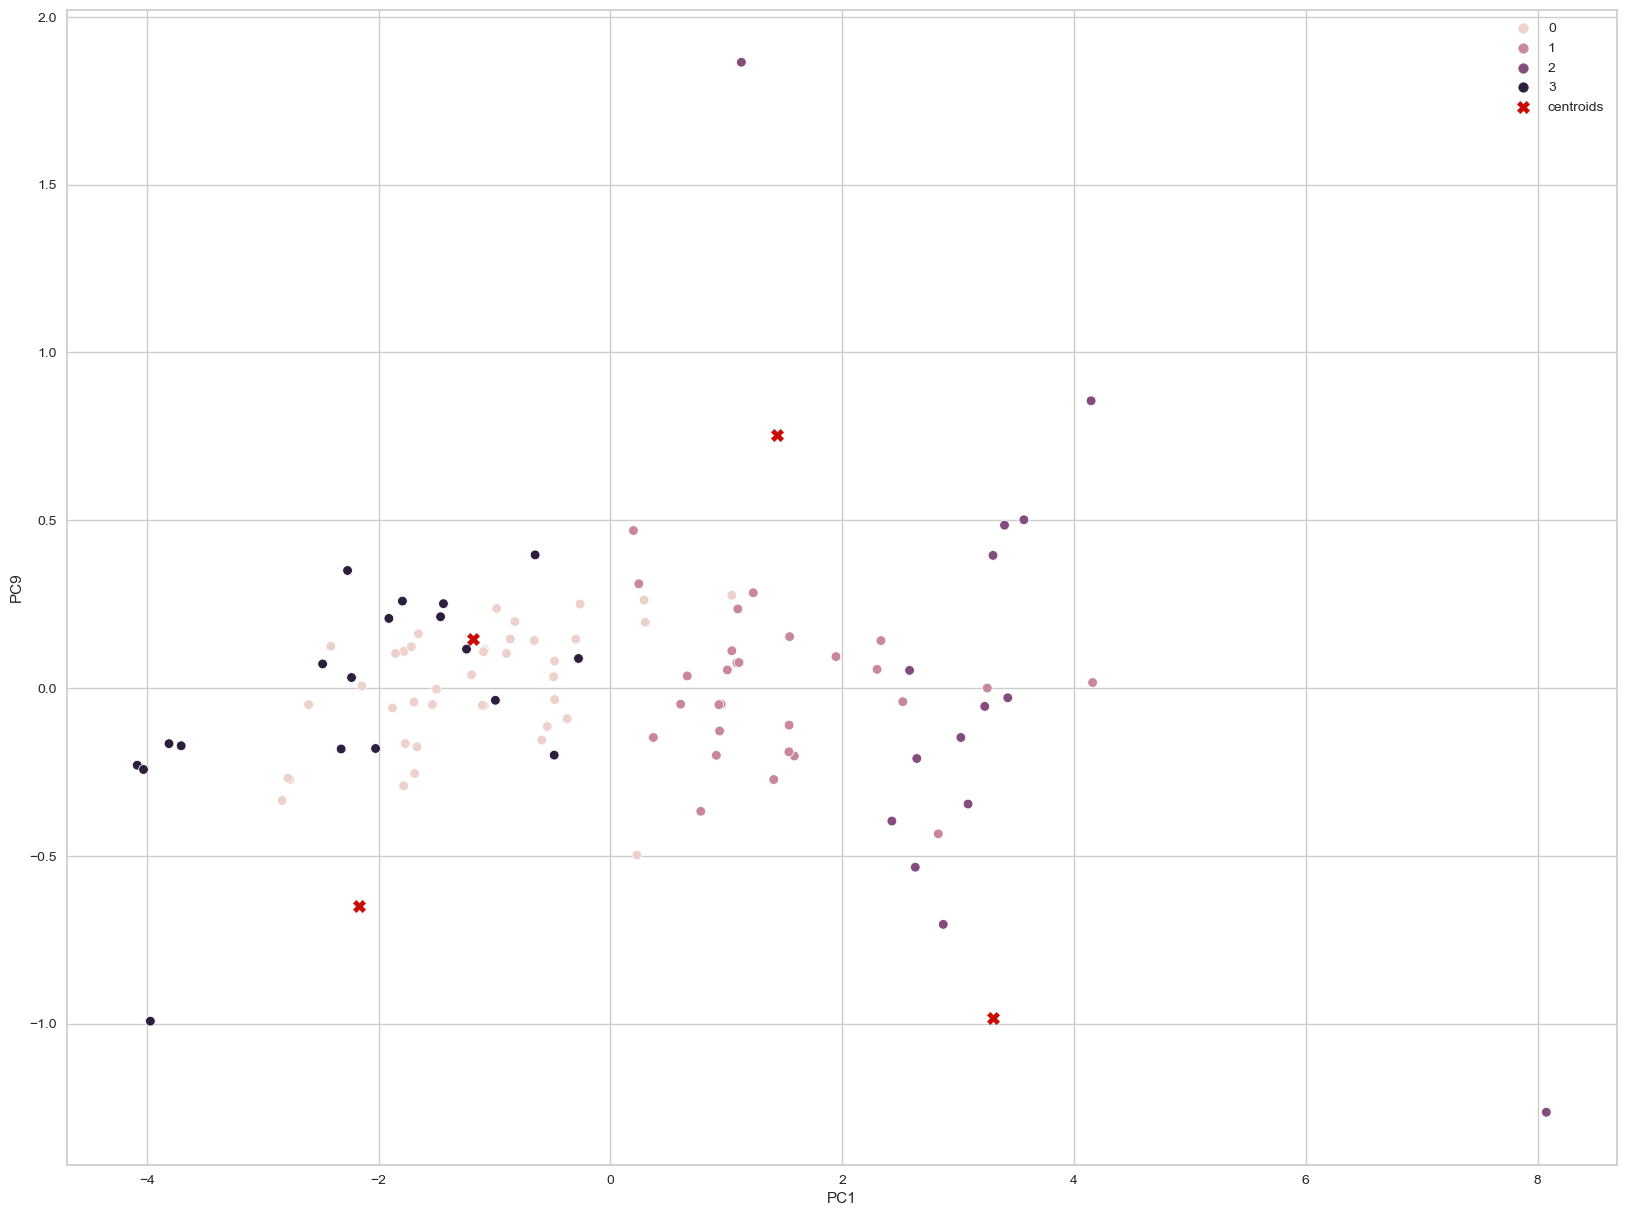

In [101]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.savefig("cluster.png")
plt.show()

## Regression for data2

In [102]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)
     

In [104]:

print(lm.intercept_)

4643.522050485438


In [105]:

lm.coef_

array([ 1101.5872075 ,  -741.20904198,   208.53617452,   508.32245827,
         122.35330123,  1579.00685826,   333.61147115, -1079.99511501,
        1461.7226913 ])

In [106]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [107]:

cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
PC1  1101.587208
PC2  -741.209042
PC3   208.536175
PC4   508.322458
Pc5   122.353301
PC6  1579.006858
PC7   333.611471
PC8 -1079.995115
PC9  1461.722691

In [108]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [109]:

y_test

37     3744.0000
1      2496.0000
69     5233.2800
80     3243.7184
92     3064.8384
61     5459.5840
85     2903.6800
53     3328.0000
88     3952.0000
32     2594.5088
6      2654.0800
71     3744.0000
43     2041.2288
16    15040.9792
50     6609.8240
31     3170.3360
97     4451.2000
14     2866.9888
25     3744.0000
51    17888.0000
21     4877.1840
3      5660.9280
84     5876.4992
57     2062.5280
48    12396.8000
47     8565.0240
79    12338.6432
58     3328.0000
2      4695.8080
13     5408.0000
45     3064.8384
89     3120.0000
41     2826.3872
23    10400.0000
26     2745.6000
22     2912.0000
94     3153.2800
27     5028.3584
20     2424.9472
66     2766.0672
30     5604.1856
35     3098.1184
Name: inr(10e3), dtype: float64

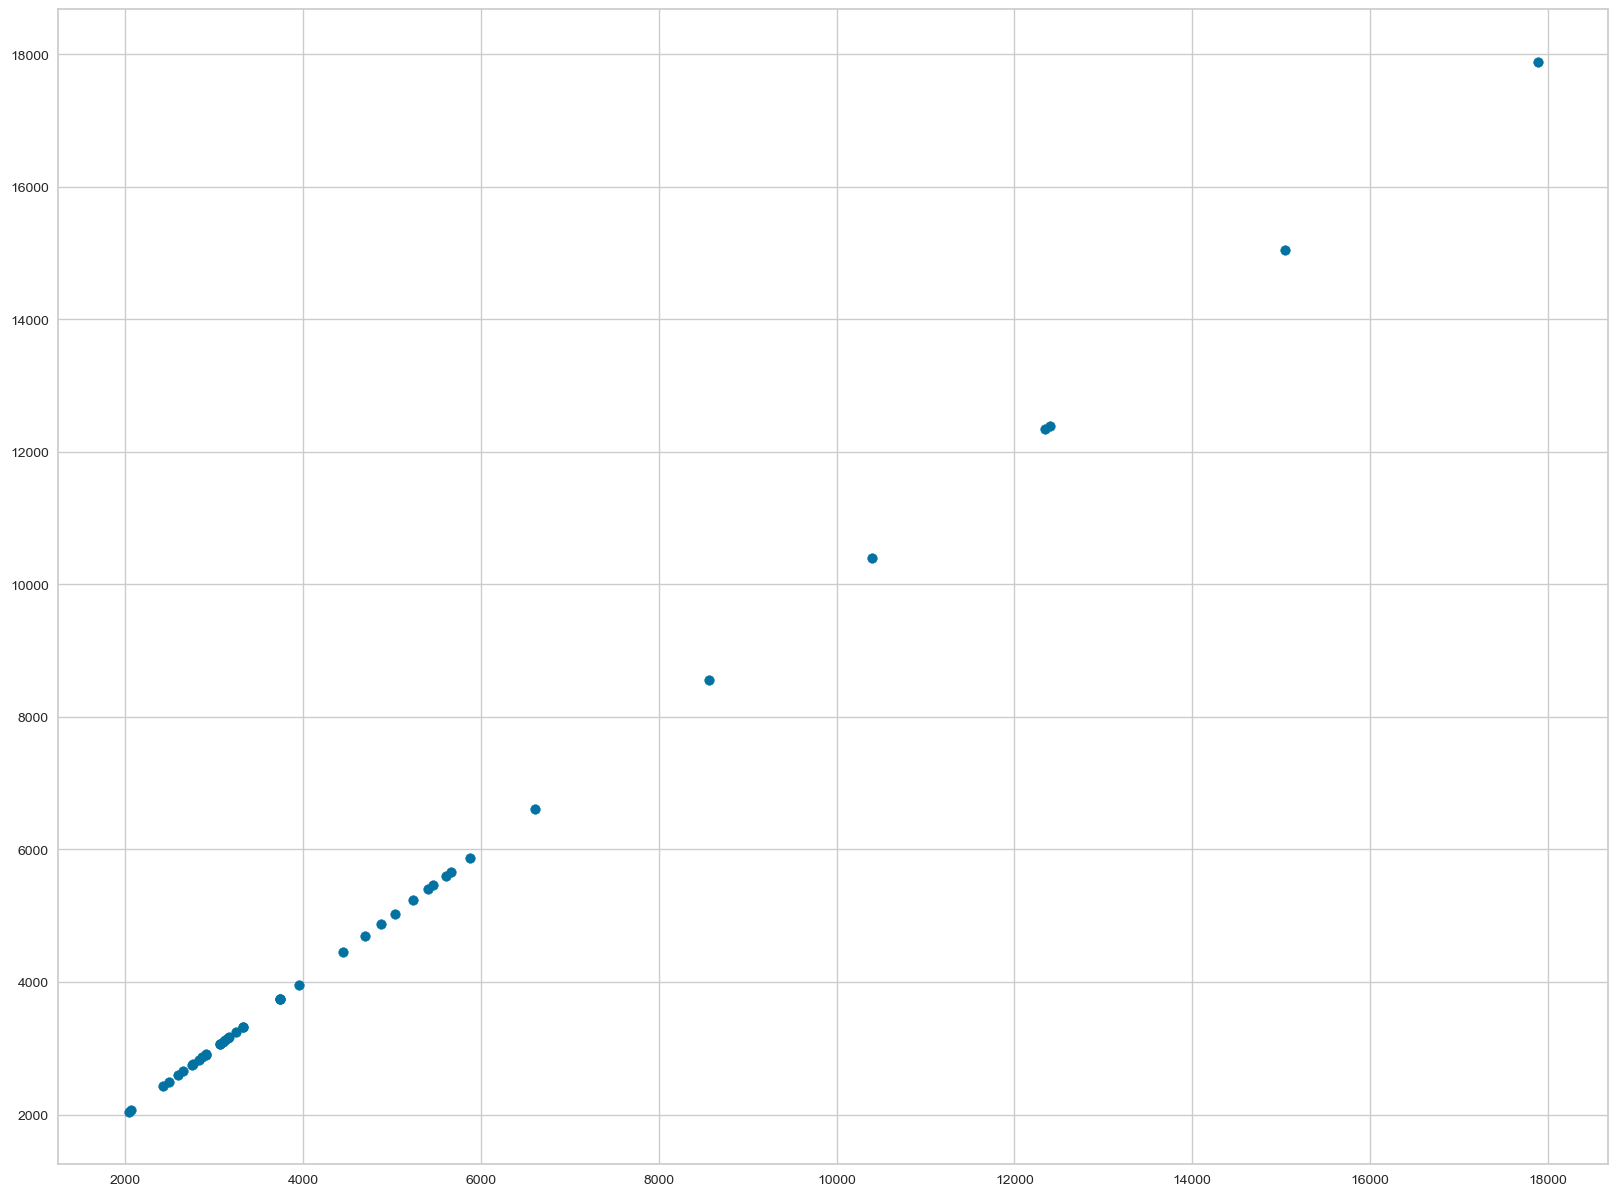

In [110]:
plt.scatter(y_test, predictions)


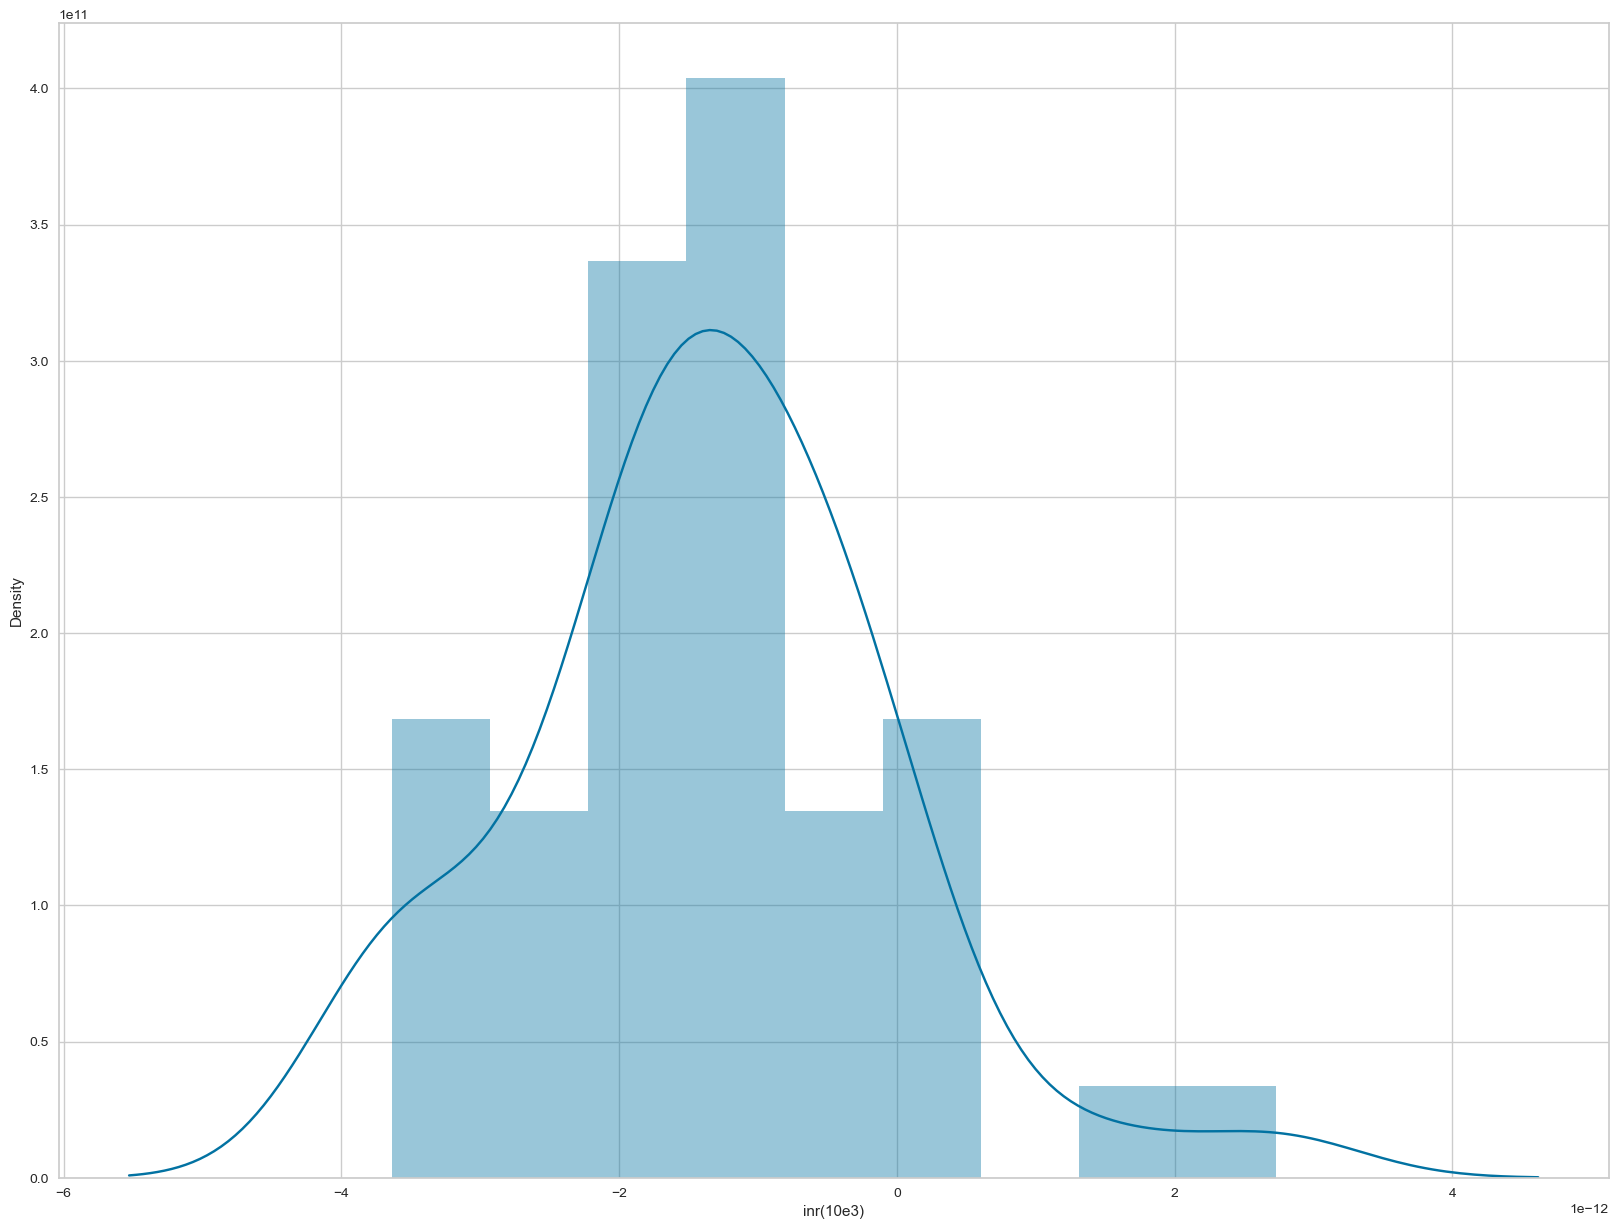

In [113]:

#Residual histogram plot
sns.distplot((y_test-predictions));
     

In [118]:

print('MAE:',mean_absolute_error(y_test,predictions))
print('MSE:',mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 1.5699610923461262e-12
MSE: 3.618915179919496e-24
RMSE: 1.902344653294848e-12


In [120]:
mean_absolute_error(y_test,predictions)

1.5699610923461262e-12

In [122]:
mean_squared_error(y_test,predictions)

3.618915179919496e-24

In [123]:
np.sqrt(mean_squared_error(y_test,predictions))

1.902344653294848e-12